<p style="text-align:center;"><span style="font-size:38px;"><span style="color:#0A1121;"><span style="font-family:Georgia;"> Customer segmentation by clustering algorithms! </span> </span>  </span></p>

<div style = 'border : 3px solid non; background-color:#8F9AB3;padding:10px;color:white'>
    <p>About 9000 customer usage behavior from their credit card, gathered in a dataset which i want to do a clustering for them.<p>
    <p>There are 18 features for every sample and what i want to do is using these informations and labeling customers for a marketing strategy purposes.<p>
    <p>In this notebook, after preprocessing and EDA part i tried 8 different clustering algorithms such as : K-Means - Affinity propagation - Mean-shift - DBSCAN - Gaussian mixtures - BIRCH - MiniBatchKMeans - Hierarchical clustering.<p>
     <p>At last i compared best models, their metrics and scores, and customer labels. <p>

# <div style="padding: 10px; background-color:#215669; margin: 0; color:#D8C4E1 ; font-family: Gill Sans, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;">Importing libraries & data</div>

In [1]:
import numpy as np                    # import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings                        # for ignoring warnings
warnings.simplefilter (action = 'ignore')

In [2]:
from sklearn.preprocessing import StandardScaler        # for Scalling
                                                        # for algorithms
from sklearn.mixture import GaussianMixture         
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch
from sklearn.cluster import SpectralClustering
                                                        # for metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score 
from kneed import KneeLocator                           # for elbow

In [3]:
# import and transforming dataset to dataframe
data = pd.read_csv ("Customer_Data.csv")
df = pd.DataFrame (data)
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

# <div style="padding: 10px; background-color:#215669; margin: 0; color:#D8C4E1 ; font-family: Gill Sans, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;">PreProcessing</div>

In [4]:
df.describe ().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

<div style = 'border : 3px solid non;text-align: center; background-color:#8F9AB3; padding:10px; color:#FFFFFF'>All value ranges are fine!

In [5]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

<div style = 'border : 3px solid non;text-align: center; background-color:#8F9AB3; padding:10px; color:#FFFFFF'>All data types are fine!

In [6]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<div style = 'border : 3px solid non; background-color:#8F9AB3;padding:10px;color:#FFFFFF'>
    <p>313 missing value in MINIMUM_PAYMENTS column<p>
    <p>and 1 missing value in CREDIT_LIMIT column<p>

In [7]:
df_mv = df [df ['CREDIT_LIMIT'].isnull()]
df_mv

CUST_ID    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5203  C15349  18.400472           0.166667        0.0               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5203                     0.0    186.853063                  0.0   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5203                         0.0                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5203                0.166667                 1              0           NaN   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
5203  9.040017         14.418723               0.0       6

In [8]:
df = df.dropna (subset = ['CREDIT_LIMIT'])

<div style = 'border : 3px solid non; background-color:#8F9AB3;padding:10px;color:#FFFFFF'>
    <p>About CREDIT_LIMIT column, there are 8950 rows in dataset, so removing 1 row is much better way to save time<p>
    <p>But in MINIMUM_PAYMENTS column there are 313 missing values. I can remove them because it's not a huge number in 8950 rows, but I will try to fill them<p>

<div style = 'border : 3px solid non;text-align: center; background-color:#8F9AB3; padding:10px; color:#FFFFFF'>checking the correlation of MINIMUM_PAYMENTS column with other columns

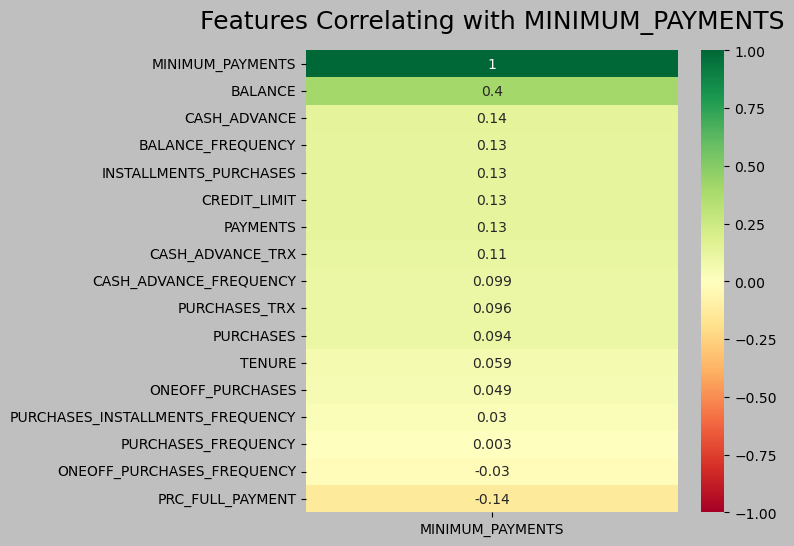

In [9]:
plt.style.use('grayscale')
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(df.corr()[['MINIMUM_PAYMENTS']].sort_values(by='MINIMUM_PAYMENTS', ascending=False), vmin=-1, vmax=1, annot=True, cmap='RdYlGn')
heatmap.set_title('Features Correlating with MINIMUM_PAYMENTS', fontdict={'fontsize':18}, pad=16);

<div style = 'border : 3px solid non;text-align: center; background-color:#8F9AB3; padding:10px; color:#FFFFFF'>checking the distribution of MINIMUM_PAYMENTS to fill the missing values

<AxesSubplot:xlabel='MINIMUM_PAYMENTS', ylabel='Count'>

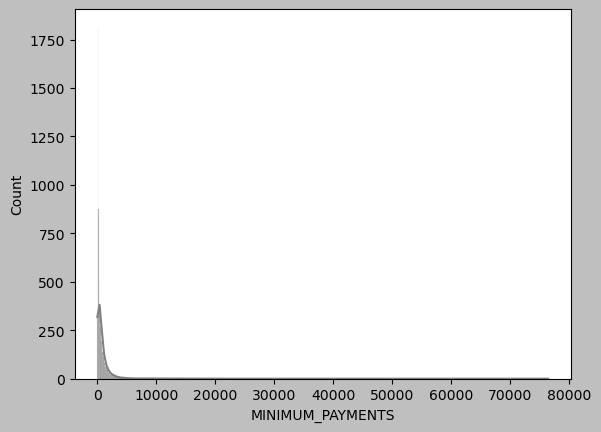

In [10]:
sns.histplot(df['MINIMUM_PAYMENTS'], kde=True)

<div style = 'border : 3px solid non; background-color:#8F9AB3;padding:10px;color:#FFFFFF'>
    <p>There are some methods to fill the missing values like :<p> 
    <p>Mean imputation is often used when the missing values are numerical and the distribution of the variable is approximately normal.<p>
    <p>Median imputation is preferred when the distribution is skewed, as the median is less sensitive to outliers than the mean.<p>
    <p>Mode imputation is suitable for categorical variables or numerical variables with a small number of unique values.<p>

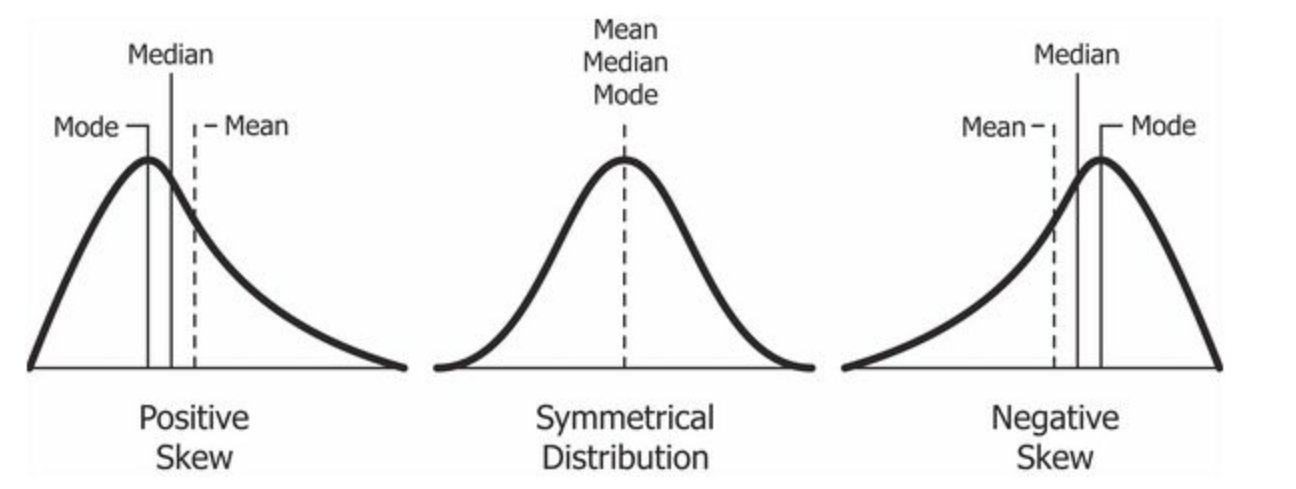

<div style = 'border : 3px solid non; background-color:#8F9AB3;padding:10px;color:#FFFFFF'>
    <p>We can try knnimputer too<p>
    <p>But becuase we have somehow a large dataset and we have a clear skewed distribution, i dicided to choose median method to fill missing values<p>

In [11]:
df.fillna(df.median() , inplace = True)

In [12]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<div style = 'border : 3px solid non;text-align: center; background-color:#8F9AB3; padding:10px; color:#FFFFFF'>checking for duplicated rows

In [13]:
df.duplicated ().sum ()

0

In [14]:
df.nunique()

CUST_ID                             8949
BALANCE                             8870
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4322
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8710
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

# <div style="padding: 10px; background-color:#215669; margin: 0; color:#D8C4E1 ; font-family: Gill Sans, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;">EDA</div>

<div style = 'border : 3px solid non;text-align: center; background-color:#8F9AB3; padding:10px; color:#FFFFFF'>checking for noises and outliers

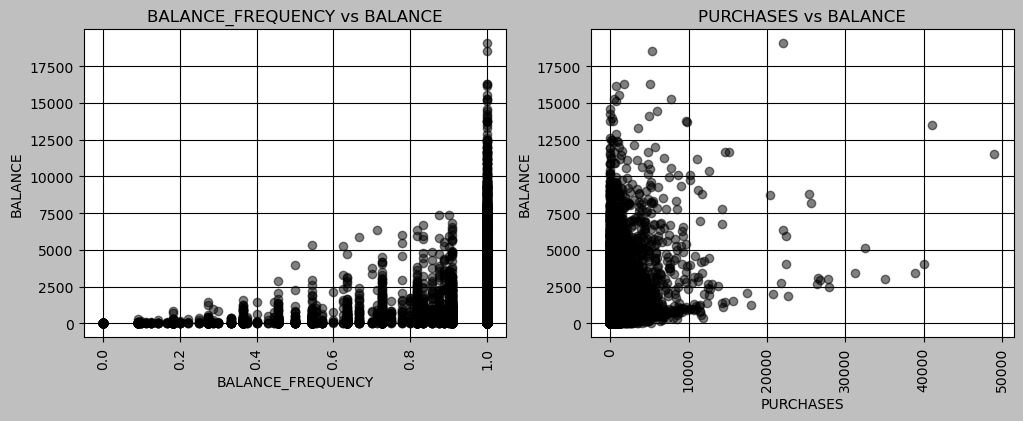

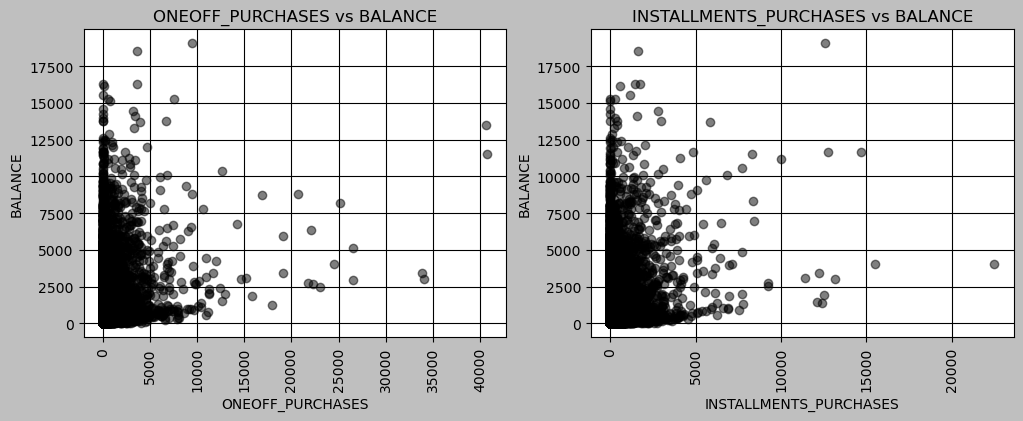

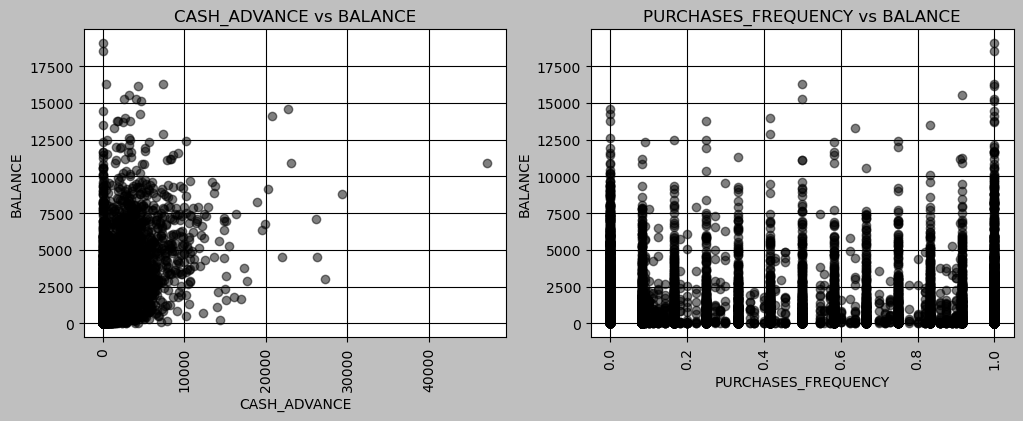

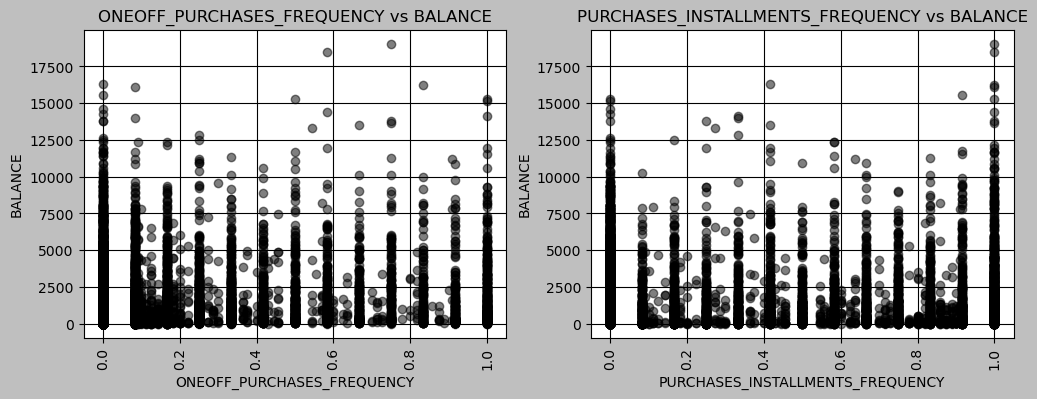

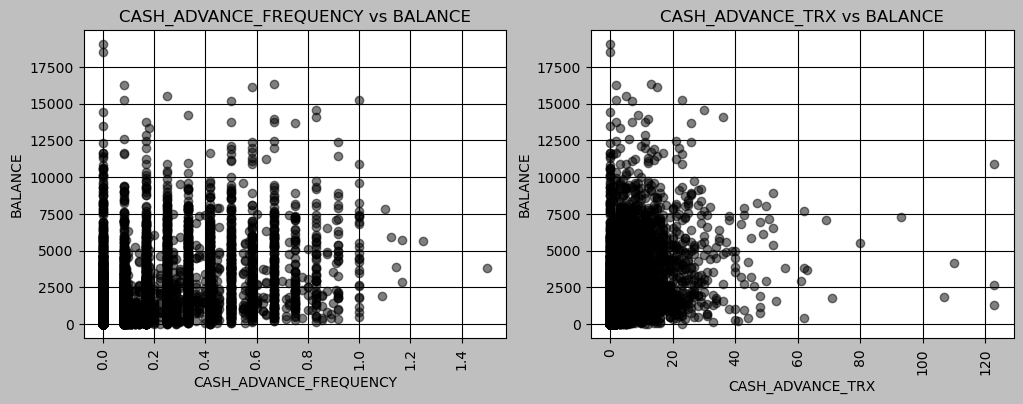

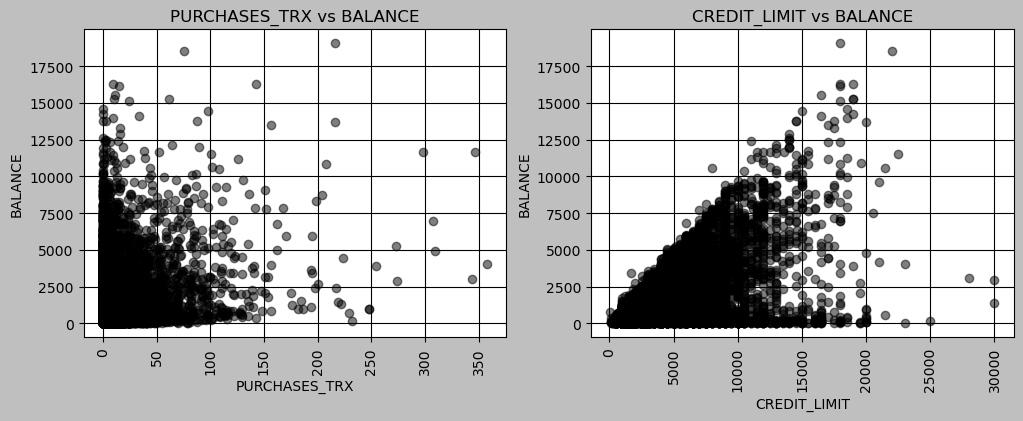

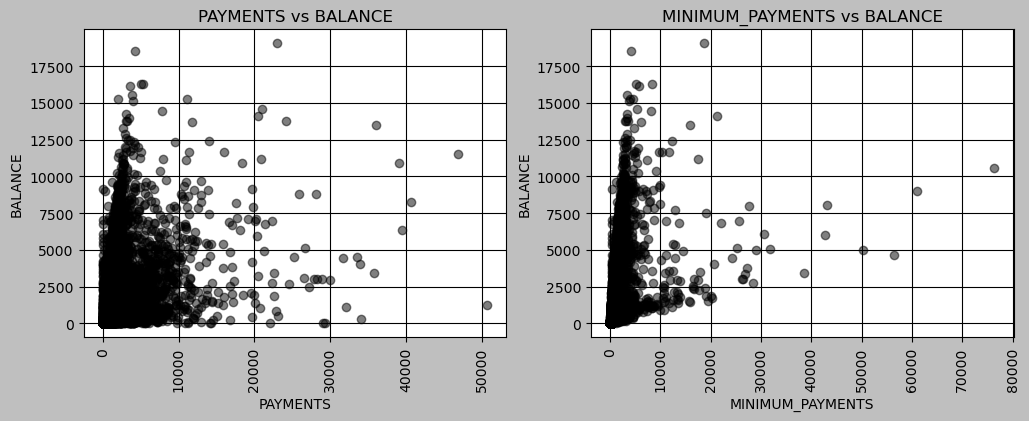

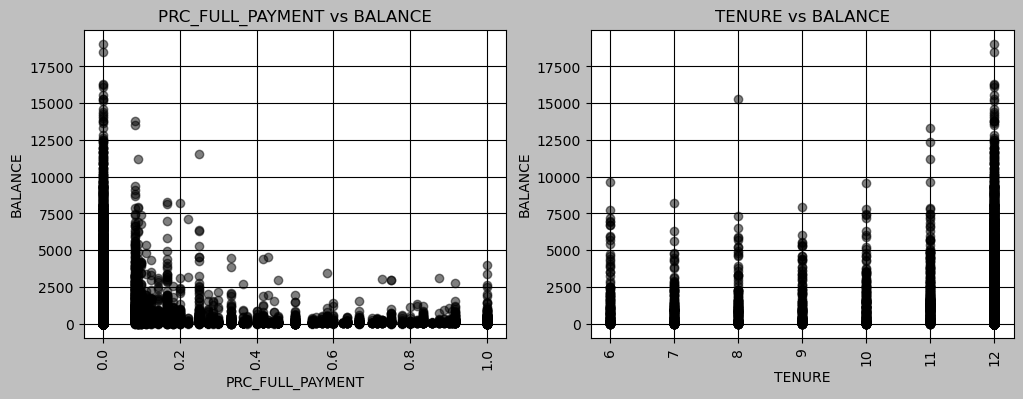

In [15]:
scatter_plot = list (df.drop (["CUST_ID" , 'BALANCE'] , axis = 1))               
i =  0
while i < 16:
    plt.figure (figsize = [12 , 4])
    plt.subplot (1 , 2 , 1)   
    plt.scatter (df [scatter_plot [i]] , df ["BALANCE"] , alpha = .5)
    plt.title (scatter_plot [i] + " vs BALANCE")
    plt.xlabel (scatter_plot [i])
    plt.xticks (rotation = 90)
    plt.ylabel ("BALANCE")
    plt.grid ()
    i += 1
    plt.subplot (1 , 2 , 2)
    plt.scatter (df [scatter_plot [i]] , df ["BALANCE"] , alpha = .5)
    plt.title (scatter_plot [i] + " vs BALANCE")
    plt.xlabel (scatter_plot [i])
    plt.xticks (rotation = 90)
    plt.ylabel ("BALANCE")
    plt.grid ()
    i += 1
    plt.show ()

<div style = 'border : 3px solid non; background-color:#8F9AB3;padding:10px;color:#FFFFFF'>
    <p>there isn't any noises and all smaples make sense<p>

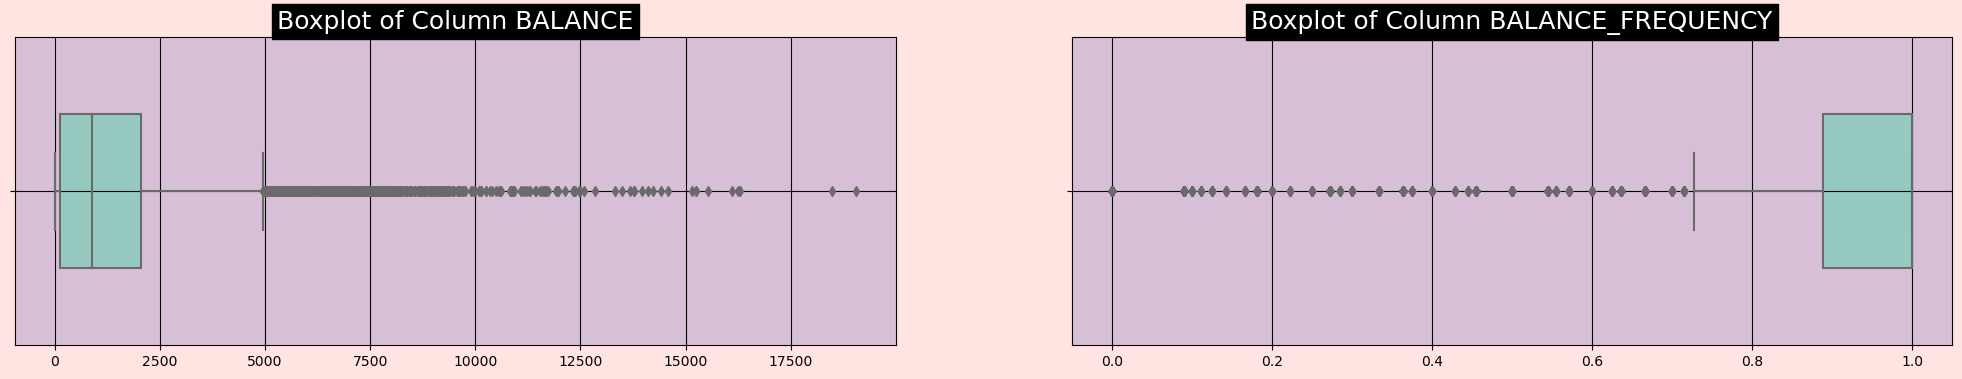

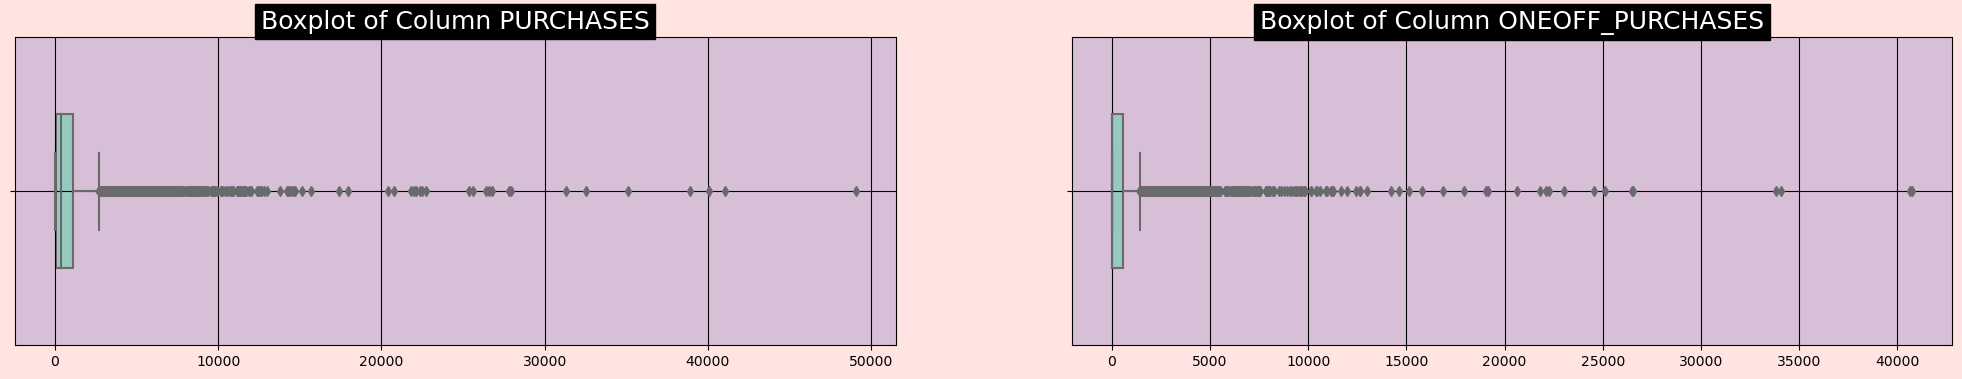

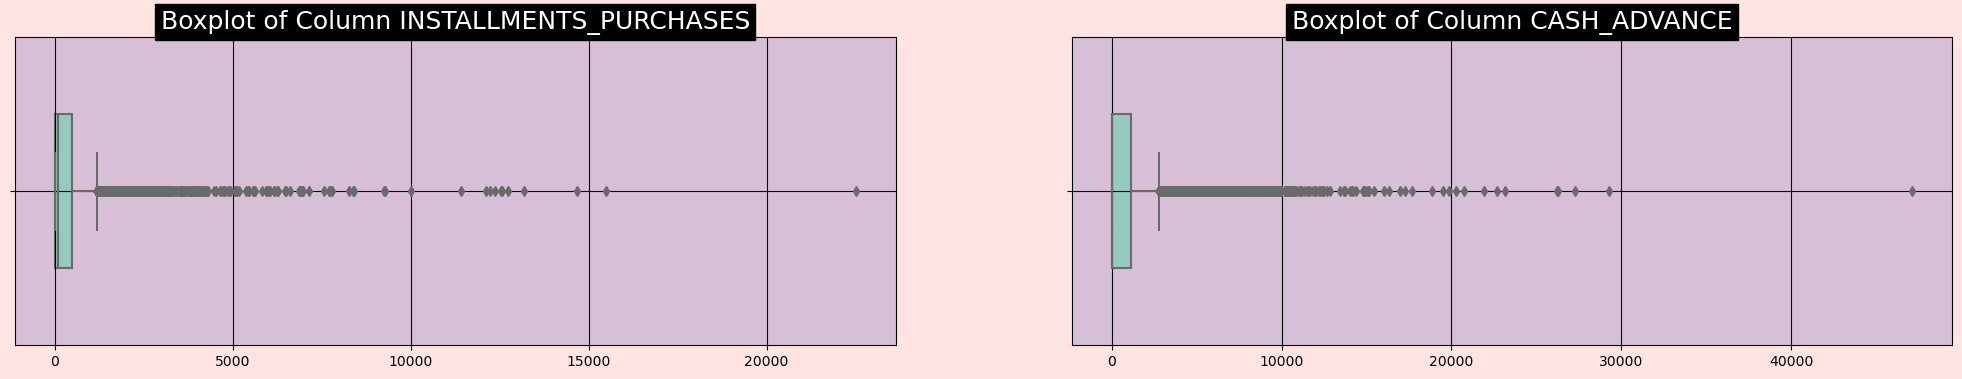

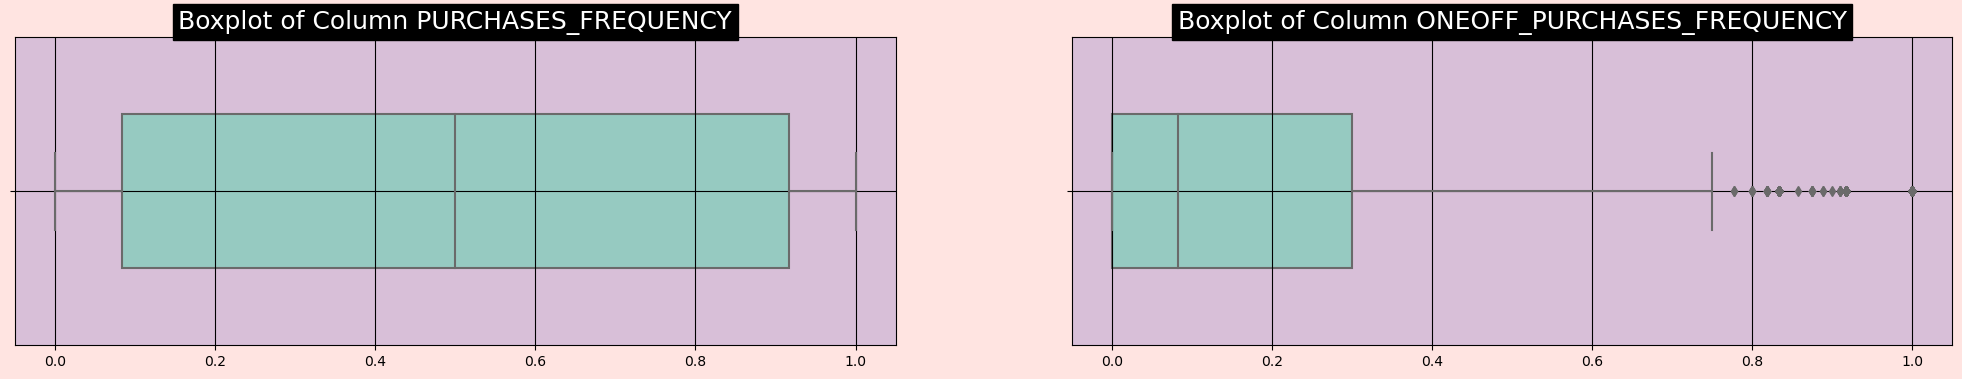

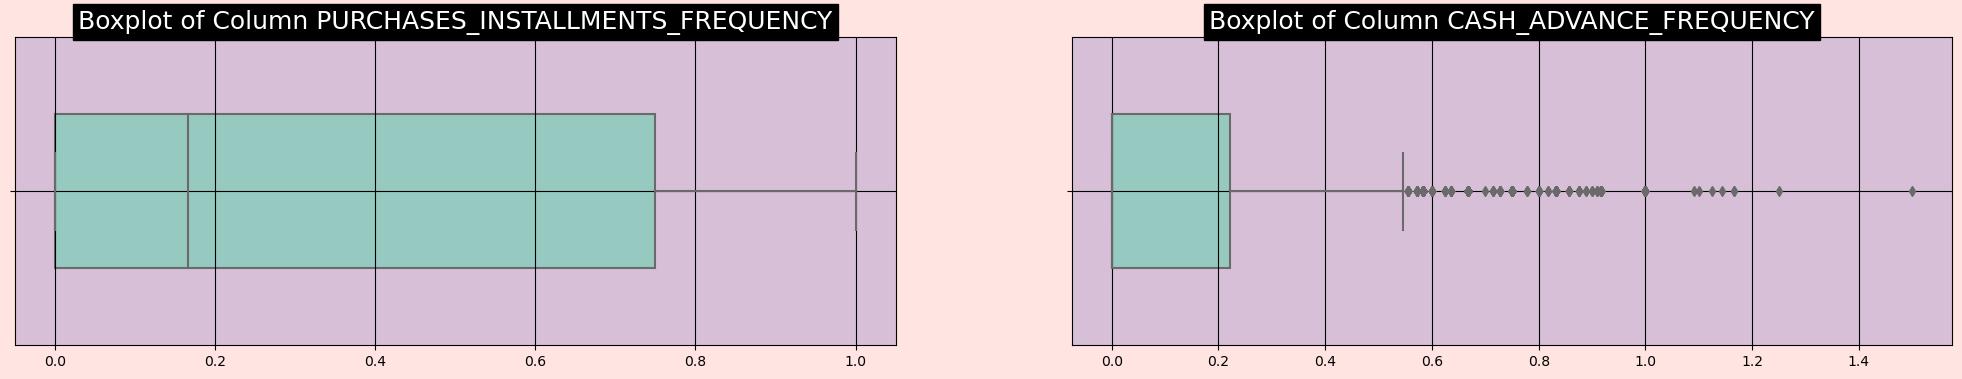

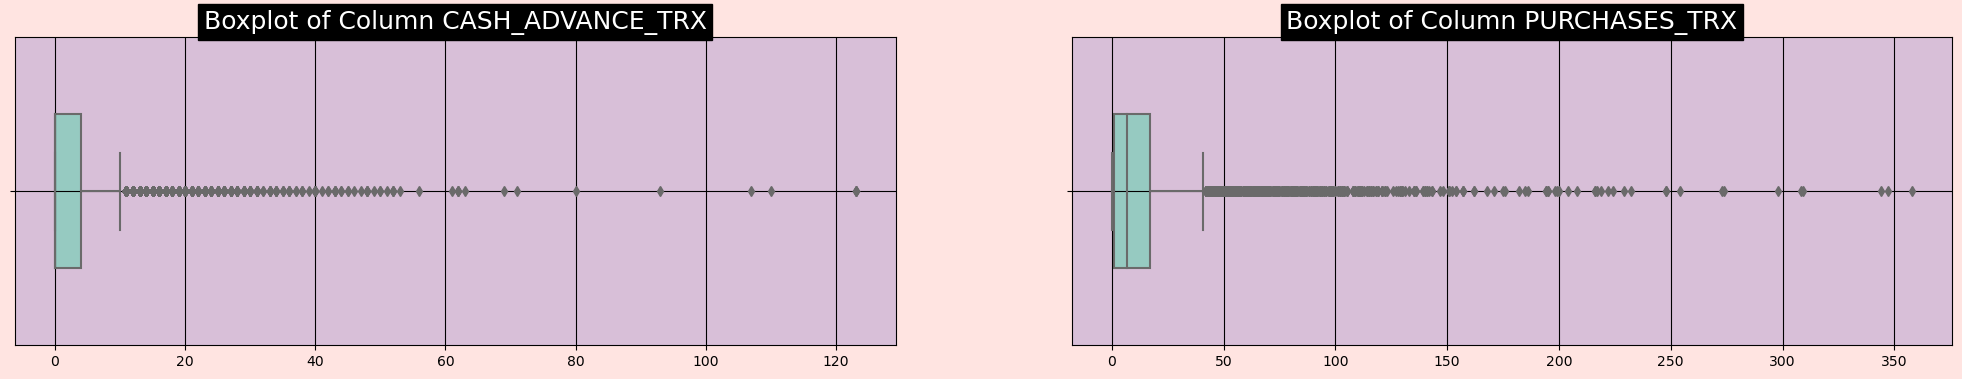

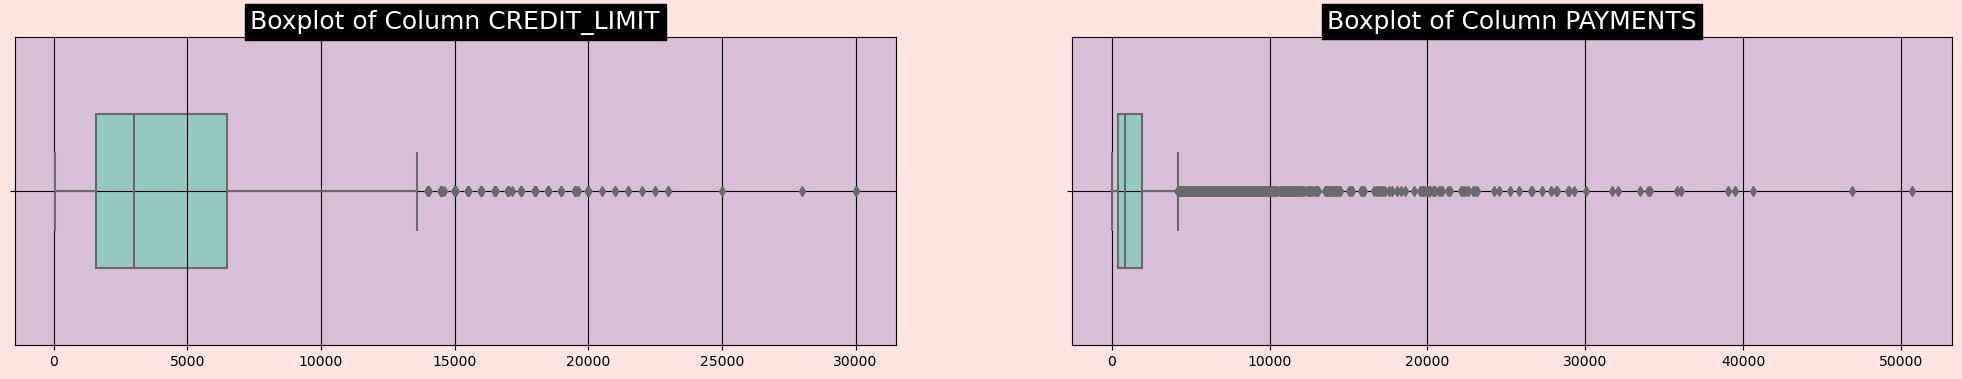

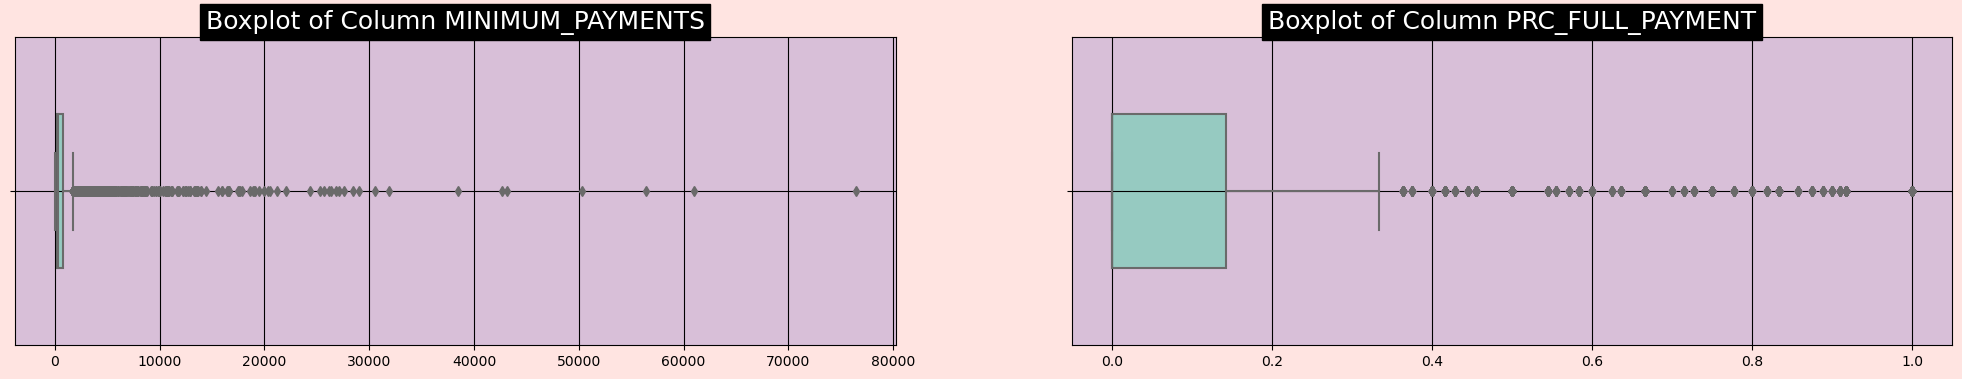

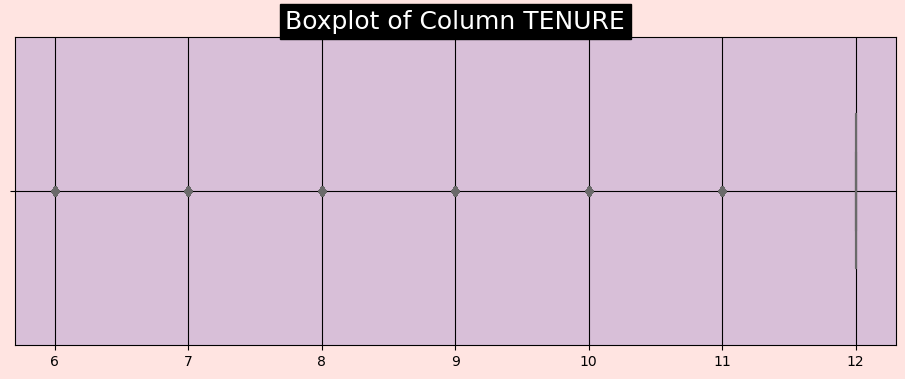

In [16]:
df_box = list (df.drop ("CUST_ID", axis = 1))   
i =  0
while i < len(df_box):
    fig = plt.figure(figsize = (25, 4), facecolor='mistyrose')
    
    plt.subplot (1 , 2 , 1)
    box = sns.boxplot(x=df_box [i], data=df, palette="Set3", width=0.5, dodge=True )
    box.set_title("Boxplot of Column " + df_box [i] , fontsize=18 , backgroundcolor = 'black',color='white')
    box.set(xlabel=None)
    box.set_facecolor('thistle')
    plt.grid()
    i += 1

    if i < len(df_box):
        plt.subplot (1 , 2 , 2)
        box = sns.boxplot(x=df_box [i], data=df, palette="Set3", width=0.5, dodge=True )
        box.set_title("Boxplot of Column " + df_box [i] , fontsize=18 , backgroundcolor = 'black',color='white')
        box.set(xlabel=None)
        box.set_facecolor('thistle')
        plt.grid()
        i += 1

    plt.show()

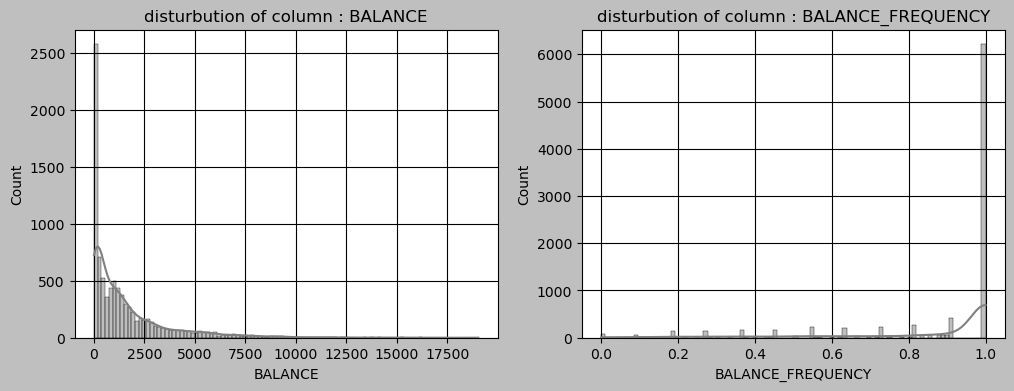

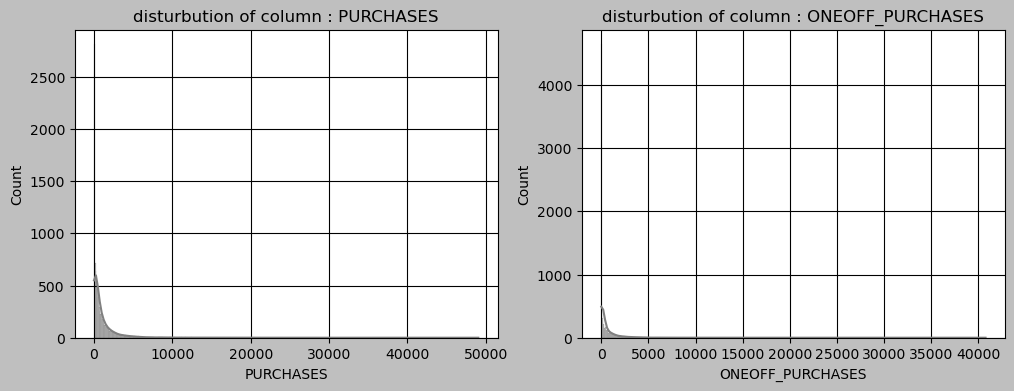

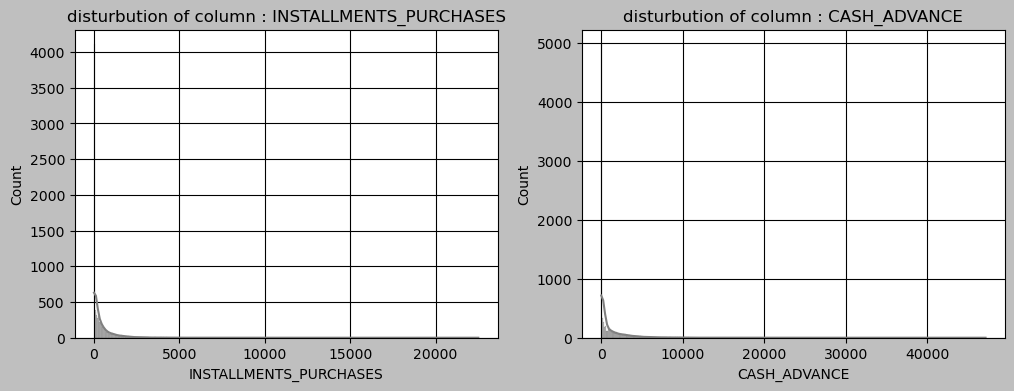

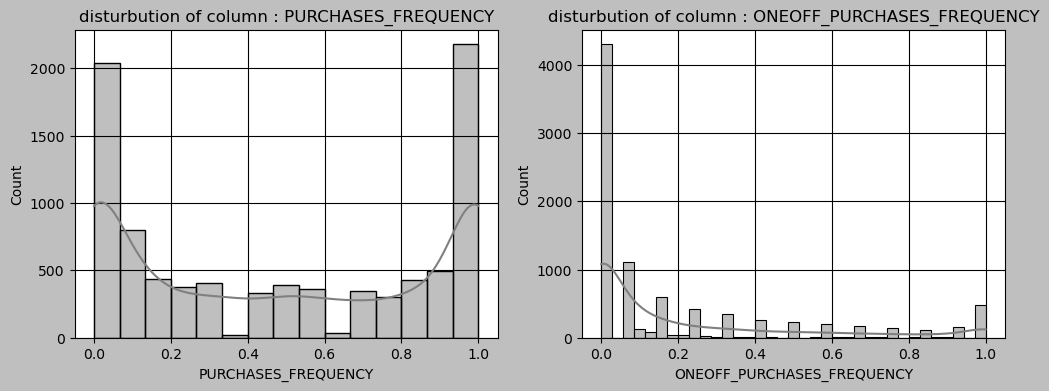

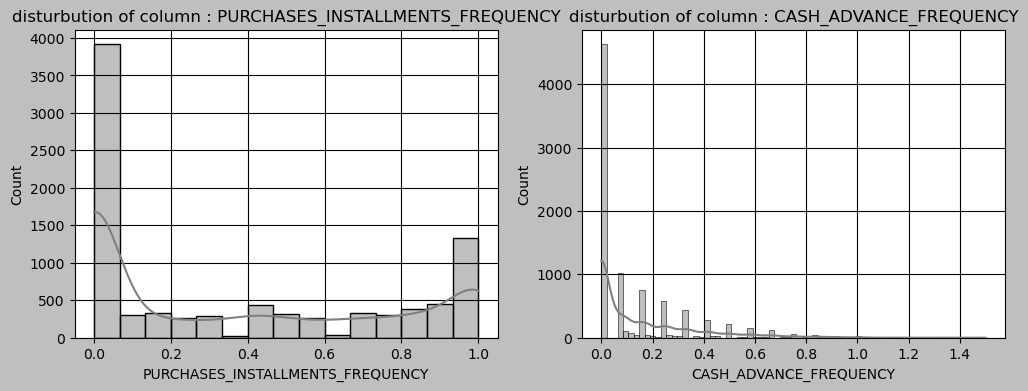

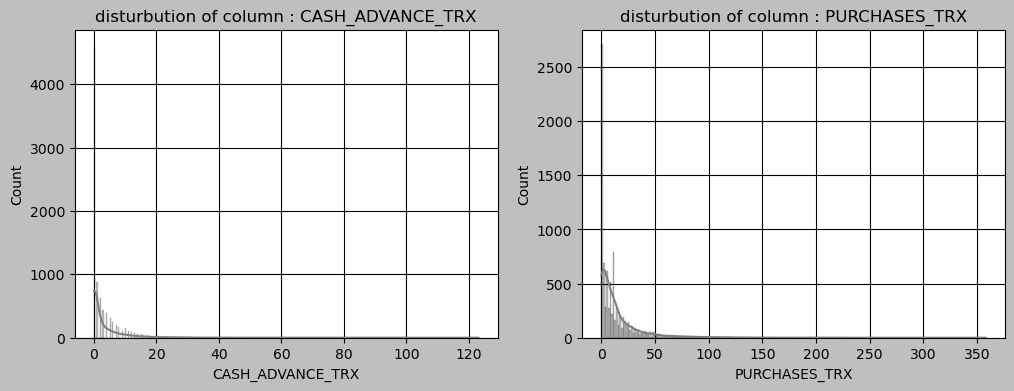

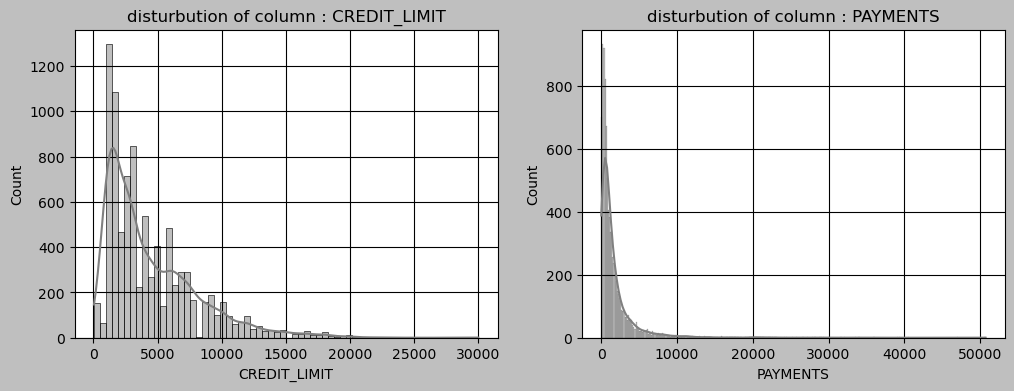

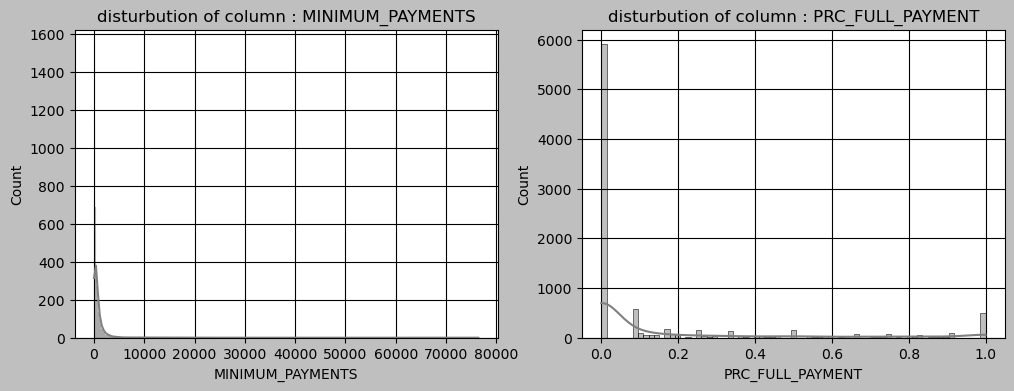

In [17]:
hist_plot = list (df.drop ("CUST_ID" , axis = 1))               
i =  0
while i < 16:
    plt.figure (figsize = [12 , 4])
    plt.subplot (1 , 2 , 1)   
    sns.histplot(df [hist_plot [i]] , kde=True)
    plt.title ('disturbution of column : ' + hist_plot [i])
    plt.grid ()
    i += 1
    plt.subplot (1 , 2 , 2)
    sns.histplot(df [hist_plot [i]] , kde=True)
    plt.title ('disturbution of column : ' + hist_plot [i])
    plt.grid ()
    i += 1
    plt.show ()

<div style = 'border : 3px solid non; background-color:#8F9AB3;padding:10px;color:#FFFFFF'>
    <p>As you can see most of the columns have a skewed distribution<p>
    <p>Also we have about 4 columns which have two peaks in their disturbution<p>

<AxesSubplot:>

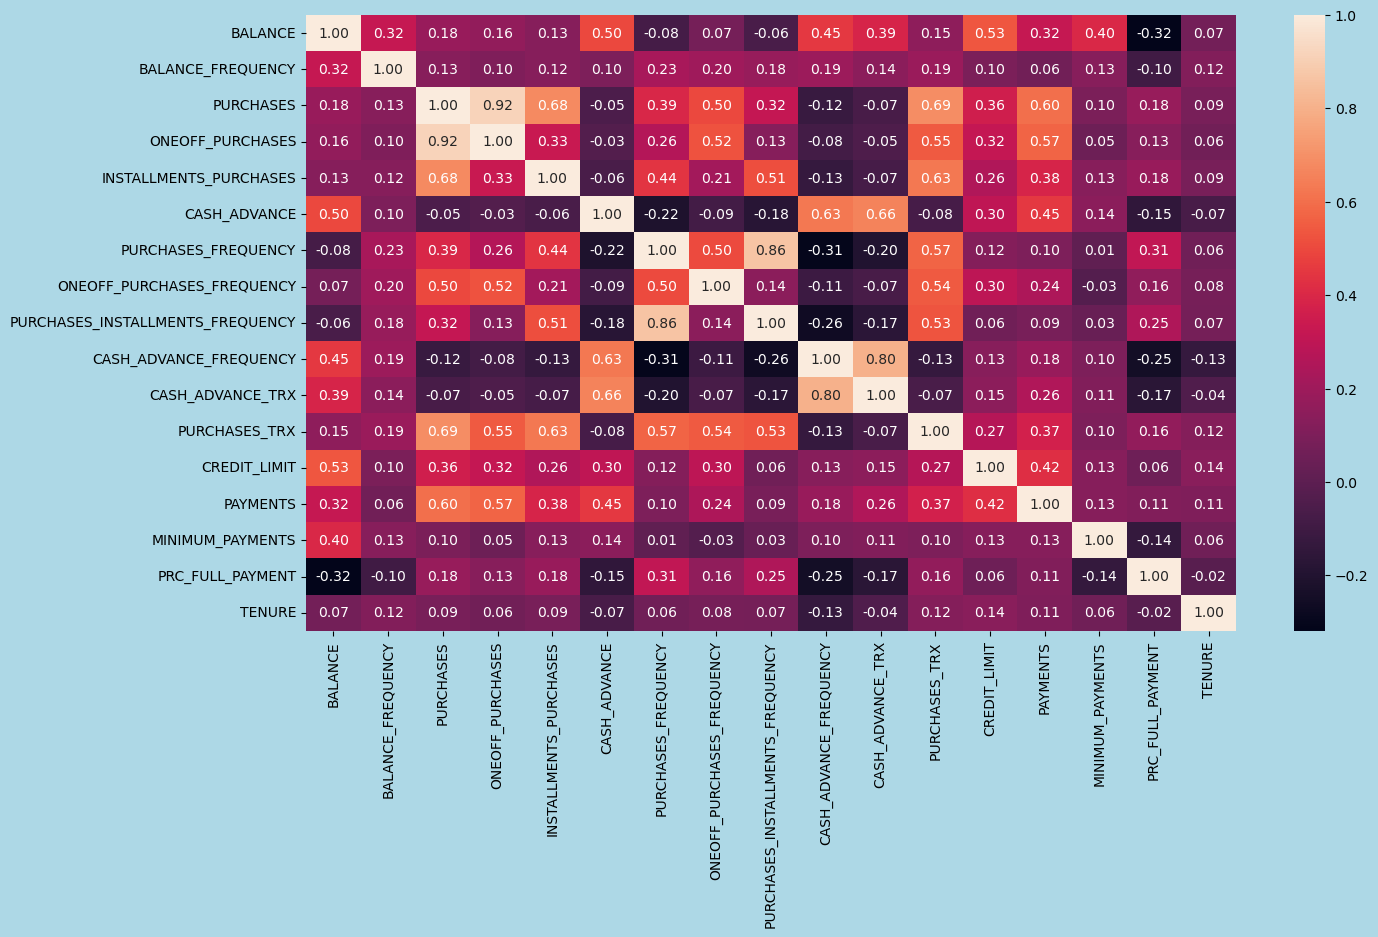

In [18]:
fig = plt.figure(figsize = (15, 8), facecolor='lightblue')
sns.heatmap(df.corr() , annot=True , fmt=".2f")

<div style = 'border : 3px solid non; background-color:#8F9AB3;padding:10px;color:#FFFFFF'>
    <p>Here all columns and correlation to each other is clear.<p>

# <div style="padding: 10px; background-color:#215669; margin: 0; color:#D8C4E1 ; font-family: Gill Sans, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;">Clustering</div>

<div style = 'border : 3px solid non;text-align: center; background-color:#8F9AB3; padding:10px; color:#FFFFFF'>defining some functions for visualization

In [19]:
def plot1 (model24):
    labels = model24.fit_predict(scaled_features)
    plt.scatter(scaled_features[:, 0], scaled_features[:, 12], c=labels, s=40, cmap='viridis')

In [20]:
def plot2 (data24) :
    plt.style.use("default")
    custom_colors = ["skyblue", "yellowgreen" , 'red' , 'purple' , 'green']
    fig, ax = plt.subplots(1, 2, figsize=(12,6),facecolor='gray') 
    ax[0].set_facecolor('purple') 

    sns.countplot(x='cluster', data=data24 , ax=ax[0], palette=custom_colors) 
    for p in ax[0].patches:
        ax[0].annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 10), 
                   textcoords = 'offset points')
    ax[0].grid(True)
    ax[0].set_title('Count Plot of Clusters')

    cluster_counts = data24 ['cluster'].value_counts()
    ax[1].pie(cluster_counts, labels = cluster_counts.index, autopct='%1.1f%%', startangle=90, 
         colors=custom_colors)
    ax[1].set_title('Percentage of Clusters')

    plt.tight_layout() 
    plt.show()

In [21]:
def plot3 (data24):
    columns_to_plot = ['BALANCE','PURCHASES','CASH_ADVANCE', 'CREDIT_LIMIT' ,
                   'PAYMENTS', 'MINIMUM_PAYMENTS', 'cluster']
    plt.rcParams['figure.facecolor'] = 'lightgrey'
    plt.style.use("bmh")
    sns.pairplot(data24 [columns_to_plot],  hue='cluster', corner=True)

# <div style="padding: 10px; background-color:#215669; margin: 0; color:#D8C4E1 ; font-family: Gill Sans, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;">GaussianMixture</div>

In [22]:
# dropping  CUST_ID column because its costumers id and it shouldnt be in our models
df.drop (['CUST_ID'] , axis = 1 , inplace = True)  

In [23]:
scaler = StandardScaler ()              # scalling the features
scaled_features = scaler.fit_transform (df)

In [24]:
silhouette = []
calinski_harabasz = []
davies_bouldin = []
for k in range(2,11):
    GMM = GaussianMixture (n_components = k , random_state = 1)
    GMM.fit (scaled_features)
    
    score = silhouette_score (scaled_features , GMM.predict(scaled_features))
    silhouette.append (score)
    
    score1 = calinski_harabasz_score (scaled_features, GMM.predict(scaled_features))
    calinski_harabasz.append(score1)
    
    score2 = davies_bouldin_score (scaled_features, GMM.predict(scaled_features))
    davies_bouldin.append (score2)

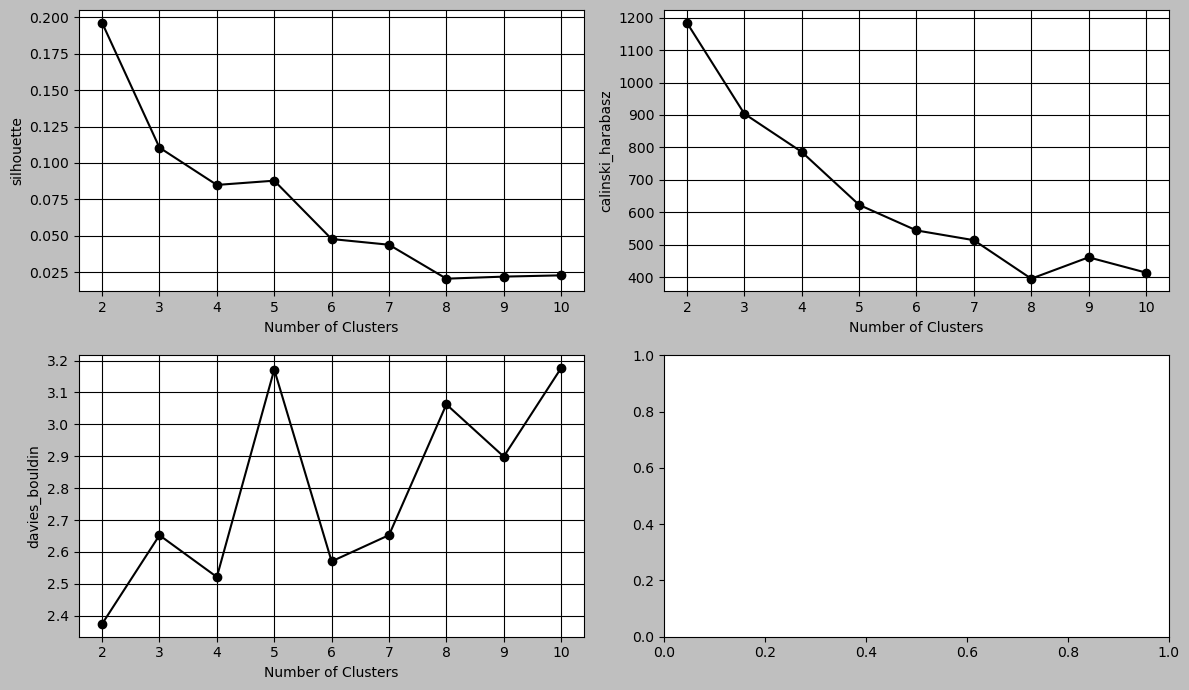

In [25]:
plt.style.use ('grayscale')
fig, axs = plt.subplots(2, 2, figsize=(12, 7))

metrics = {'silhouette': silhouette, 'calinski_harabasz': calinski_harabasz,
           'davies_bouldin': davies_bouldin}
metrics_list = list(metrics.items()) 

for i in range(2): 
    for j in range(2): 
        index = i*2 + j
        if index < len(metrics_list):
            metric_name, metric_values = metrics_list[i*2 + j] 
            axs[i, j].plot(range(2, 11), metric_values , marker = 'o')
            axs[i, j].set_xticks(range(2, 11))
            axs[i, j].set_xlabel('Number of Clusters')
            axs[i, j].set_ylabel(metric_name)
            axs[i, j].grid(True)

plt.tight_layout()
plt.show()

<div style = 'border : 3px solid non; background-color:#8F9AB3;padding:10px;color:#FFFFFF'>
    <p>n_components = 2 is the best choise, for its high scores in calinski_harabasz and silhouette metrics.<p>
    <p>Also it has lowest score in davies_bouldin<p>

In [26]:
GMM = GaussianMixture (n_components = 2 , random_state = 1)
GMM.fit (scaled_features)
score = silhouette_score (scaled_features , GMM.predict(scaled_features))
score

0.1962176161325912

<div style = 'border : 3px solid non;text-align: center; background-color:#8F9AB3; padding:10px; color:#FFFFFF'>changing parameters for better clustering

<div style = 'border : 3px solid non; background-color:#8F9AB3;padding:10px;color:#FFFFFF'>
    <p>parameters :<p>
    <p>covariance_type : {‘full’, ‘tied’, ‘diag’, ‘spherical’}, default=’full’<p>
    <p>max_iter : int, default=100<p>
    <p>n_init : int, default=1<p>
    <p>init_params : {‘kmeans’, ‘k-means++’, ‘random’, ‘random_from_data’}, default=’kmeans’<p>

In [27]:
silhouette = []
max_iter_values = range(90, 110, 1)
for i in max_iter_values:
    GMM = GaussianMixture(n_components = 2, random_state = 1, max_iter = i)
    GMM.fit(scaled_features)
    score = silhouette_score(scaled_features, GMM.predict(scaled_features))
    silhouette.append(score)


df_silhouette = pd.DataFrame(silhouette, columns=['silhouette_score'])
df_max_iter = pd.DataFrame(max_iter_values, columns=['max_iter'])
result = pd.concat([df_max_iter, df_silhouette], axis=1)
result

max_iter  silhouette_score
0         90          0.196218
1         91          0.196218
2         92          0.196218
3         93          0.196218
4         94          0.196218
5         95          0.196218
6         96          0.196218
7         97          0.196218
8         98          0.196218
9         99          0.196218
10       100          0.196218
11       101          0.196218
12       102          0.196218
13       103          0.196218
14       104          0.196218
15       105          0.196218
16       106          0.196218
17       107          0.196218
18       108          0.196218
19       109          0.196218

In [28]:
result.max ()

max_iter            109.000000
silhouette_score      0.196218
dtype: float64

<div style = 'border : 3px solid non; background-color:#8F9AB3;padding:10px;color:#FFFFFF'>
    <p>The score doesn't changed at all<p>

In [29]:
silhouette = []
covariance_type_values = ['tied', 'diag', 'spherical', 'full']
for i in covariance_type_values:
    GMM = GaussianMixture(n_components = 2, random_state = 1, covariance_type = i)
    GMM.fit(scaled_features)
    score = silhouette_score(scaled_features, GMM.predict(scaled_features))
    silhouette.append(score)


df_silhouette = pd.DataFrame(silhouette, columns=['silhouette_score'])
df_covariance_type = pd.DataFrame(covariance_type_values, columns=['covariance_types'])
result = pd.concat([df_covariance_type, df_silhouette], axis=1)
result

covariance_types  silhouette_score
0             tied          0.253173
1             diag          0.184398
2        spherical          0.286152
3             full          0.196218

<div style = 'border : 3px solid non; background-color:#8F9AB3;padding:10px;color:#FFFFFF'>
    <p>spherical silhouette score is much better<p>

In [30]:
silhouette = []
n_init_values = range(1, 11, 1)
for i in n_init_values:
    GMM = GaussianMixture(n_components = 2, random_state = 1 , covariance_type = 'spherical' , n_init = i)
    GMM.fit(scaled_features)
    score = silhouette_score(scaled_features, GMM.predict(scaled_features))
    silhouette.append(score)


df_silhouette = pd.DataFrame(silhouette, columns=['silhouette_score'])
df_n_init = pd.DataFrame(n_init_values, columns=['n_init'])
result = pd.concat([df_n_init, df_silhouette], axis=1)
result

n_init  silhouette_score
0       1          0.286152
1       2          0.286152
2       3          0.286152
3       4          0.286152
4       5          0.286152
5       6          0.286152
6       7          0.286152
7       8          0.286152
8       9          0.286152
9      10          0.286152

<div style = 'border : 3px solid non; background-color:#8F9AB3;padding:10px;color:#FFFFFF'>
    <p>it doesnt changed the score<p>

In [31]:
silhouette = []
init_params_values = ['kmeans' , 'random']
for i in init_params_values:
    GMM = GaussianMixture(n_components = 2, random_state = 1 , covariance_type = 'spherical' ,
                          init_params = i)
    GMM.fit(scaled_features)
    score = silhouette_score(scaled_features, GMM.predict(scaled_features))
    silhouette.append(score)


df_silhouette = pd.DataFrame(silhouette, columns=['silhouette_score'])
df_init_params = pd.DataFrame(init_params_values, columns=['init_params'])
result = pd.concat([df_init_params, df_silhouette], axis=1)
result

init_params  silhouette_score
0      kmeans          0.286152
1      random          0.278738

<div style = 'border : 3px solid non; background-color:#8F9AB3;padding:10px;color:#FFFFFF'>
    <p>so the default value is ok<p>

In [32]:
# all scores for covariance_type = spherical
GMM = GaussianMixture (n_components = 2 , random_state = 1 , covariance_type = 'spherical')
GMM.fit (scaled_features)
    
print ('silhouette_score : ' , silhouette_score (scaled_features , GMM.predict(scaled_features)))
print ('calinski_harabasz_score : ' , calinski_harabasz_score (scaled_features, GMM.predict(scaled_features)))
print ('davies_bouldin_score : ' , davies_bouldin_score (scaled_features, GMM.predict(scaled_features)))

silhouette_score :  0.28615173629377805
calinski_harabasz_score :  964.3925229748002
davies_bouldin_score :  2.756818532447164


In [33]:
# all scores for covariance_type = default
GMM = GaussianMixture (n_components = 2 , random_state = 1 )
GMM.fit (scaled_features)
    
print ('silhouette_score : ' , silhouette_score (scaled_features , GMM.predict(scaled_features)))
print ('calinski_harabasz_score : ' , calinski_harabasz_score (scaled_features, GMM.predict(scaled_features)))
print ('davies_bouldin_score : ' , davies_bouldin_score (scaled_features, GMM.predict(scaled_features)))

silhouette_score :  0.1962176161325912
calinski_harabasz_score :  1184.1913655481442
davies_bouldin_score :  2.3740875074958923


<div style = 'border : 3px solid non; background-color:#8F9AB3;padding:10px;color:#FFFFFF'>
    <p>by changing the value of the covariance_type => silhouette_score increased but two other metric scores decreased so we continue visualizing with 'full' value for covariance_type.<p>

<div style = 'border : 3px solid non;text-align: center; background-color:#8F9AB3; padding:10px; color:#FFFFFF'>going to visualize sample labels (clustering by GMM)

In [34]:
gmmV = df.copy ()
GMM = GaussianMixture (n_components = 2 , random_state = 1 )
GMM.fit (scaled_features)
gmmV ['cluster'] = GMM.predict(scaled_features)

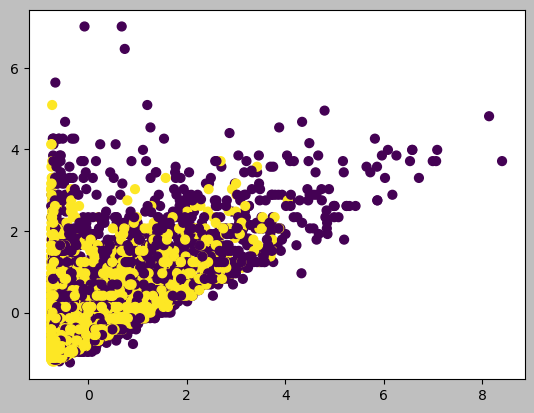

In [35]:
plot1 (GMM)

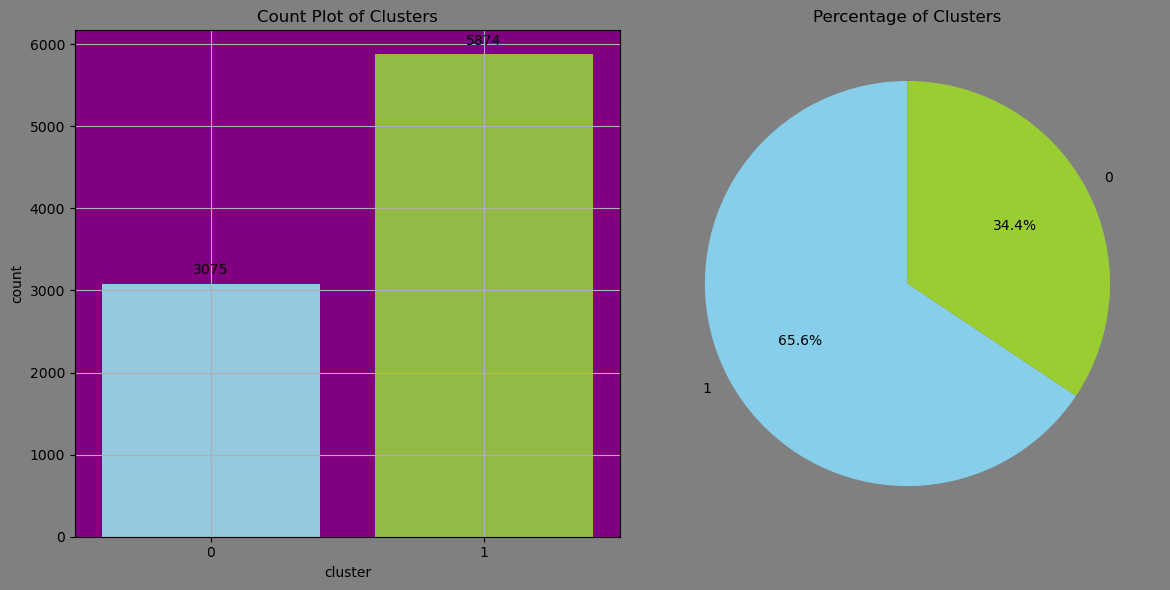

In [36]:
plot2 (gmmV)

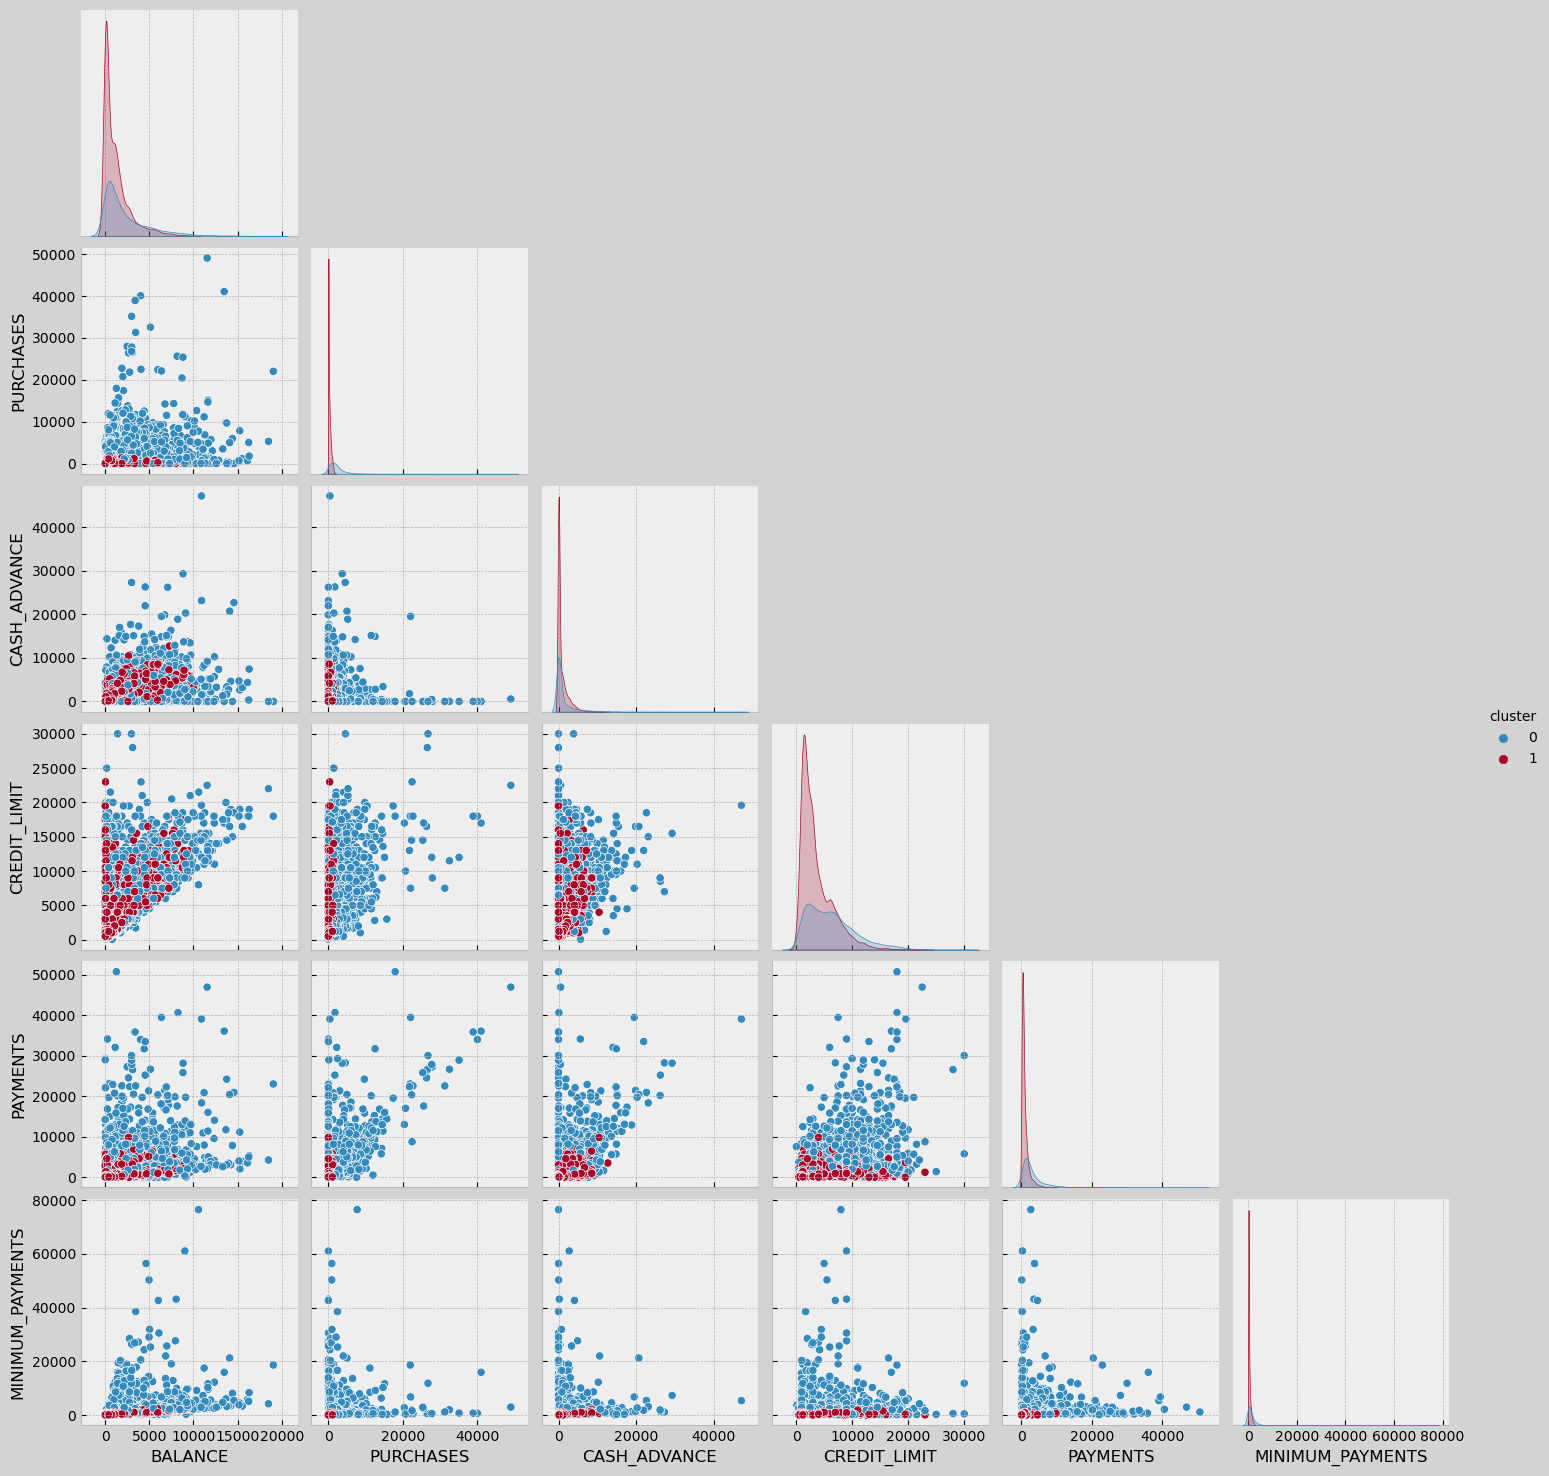

In [37]:
plot3 (gmmV)

# <div style="padding: 10px; background-color:#215669; margin: 0; color:#D8C4E1 ; font-family: Gill Sans, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;">KMeans</div>

In [38]:
silhouette = []
calinski_harabasz = []
davies_bouldin = []
inertia = []
for k in range(2,11):
    kmeans = KMeans (n_clusters = k , random_state = 42)
    kmeans.fit (scaled_features)
    
    score = silhouette_score (scaled_features , kmeans.predict(scaled_features))
    silhouette.append (score)
    
    score1 = calinski_harabasz_score (scaled_features, kmeans.predict(scaled_features))
    calinski_harabasz.append(score1)
    
    score2 = davies_bouldin_score (scaled_features, kmeans.predict(scaled_features))
    davies_bouldin.append (score2)
    
    score3 = kmeans.inertia_
    inertia.append (score3)

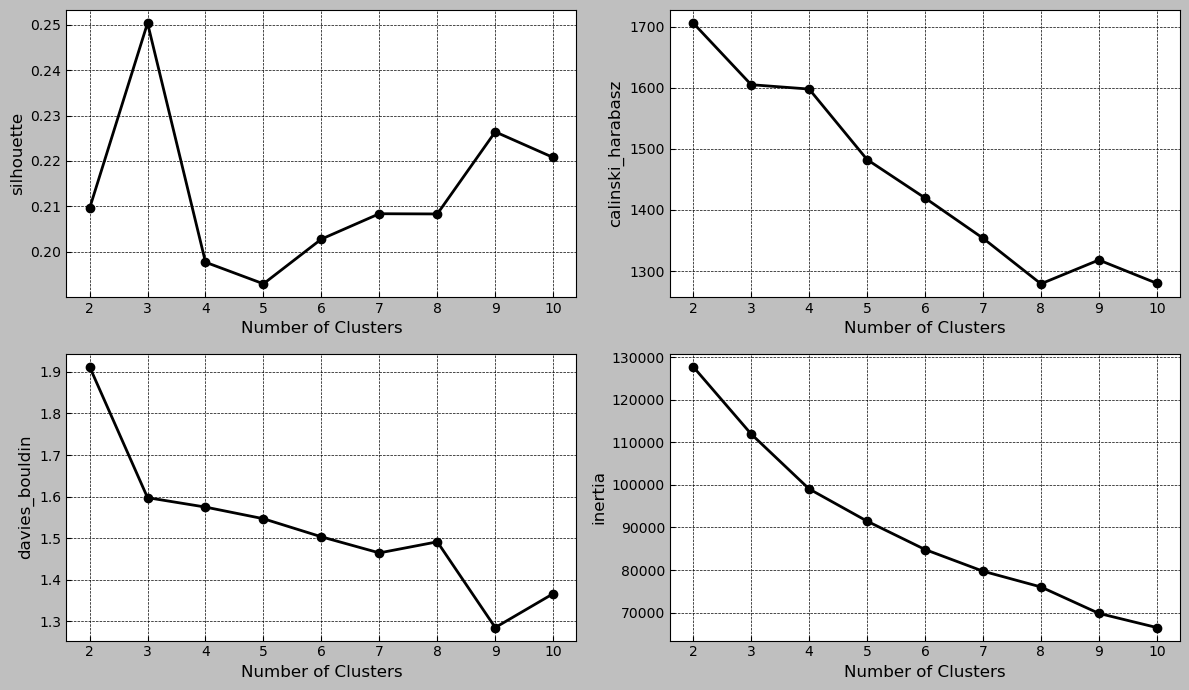

In [39]:
plt.style.use ('grayscale')
fig, axs = plt.subplots(2, 2, figsize=(12, 7))

metrics = {'silhouette': silhouette, 'calinski_harabasz': calinski_harabasz,
           'davies_bouldin': davies_bouldin , 'inertia': inertia}
metrics_list = list(metrics.items()) 

for i in range(2): 
    for j in range(2): 
        index = i*2 + j
        if index < len(metrics_list):
            metric_name, metric_values = metrics_list[i*2 + j] 
            axs[i, j].plot(range(2, 11), metric_values , marker = 'o')
            axs[i, j].set_xticks(range(2, 11))
            axs[i, j].set_xlabel('Number of Clusters')
            axs[i, j].set_ylabel(metric_name)
            axs[i, j].grid(True)

plt.tight_layout()
plt.show()

<div style = 'border : 3px solid non; background-color:#8F9AB3;padding:10px;color:#FFFFFF'>
    <p>we can see the scores in this sub plot and make decision for k number. silhouette, davies_bouldin and inertia metrics say 3 is best k number but calinski_harabasz tells us the best k nubmber is 2 so we choose 3 for the number of clusters<p>

In [40]:
# for knowing some elbows
kl1 = KneeLocator (range (2 , 11) , silhouette , curve = 'convex' , direction = 'decreasing')
print ('silhouette: ' , kl1.elbow)
kl2 = KneeLocator (range (2 , 11) , calinski_harabasz , curve = 'convex' , direction = 'decreasing')
print ('calinski_harabasz: ' , kl2.elbow)
kl3 = KneeLocator (range (2 , 11) , davies_bouldin , curve = 'convex' , direction = 'decreasing')
print ('davies_bouldin: ' , kl3.elbow)
kl4 = KneeLocator (range (2 , 11) , inertia , curve = 'convex' , direction = 'decreasing')
print ('inertia: ' , kl4.elbow)

silhouette:  2
calinski_harabasz:  8
davies_bouldin:  3
inertia:  4


<div style = 'border : 3px solid non;text-align: center; background-color:#8F9AB3; padding:10px; color:#FFFFFF'>changing parameters for better clustering

<div style = 'border : 3px solid non; background-color:#8F9AB3;padding:10px;color:#FFFFFF'>
    <p>parameters :<p>
    <p>init : {‘k-means++’, ‘random’}<p>
    <p>n_init : ‘auto’ or int, default=10<p>
    <p>max_iter : int, default=300<p>
    <p>algorithm : {“lloyd”, “elkan”, “auto”, “full”}, default=”lloyd”<p>

In [41]:
kmeans = KMeans (n_clusters = 3 , random_state = 42)
kmeans.fit (scaled_features)
    
print ('silhouette_score : ' , silhouette_score (scaled_features , kmeans.predict(scaled_features)))
print ('calinski_harabasz_score : ' , calinski_harabasz_score (scaled_features, kmeans.predict(scaled_features)))
print ('davies_bouldin_score : ' , davies_bouldin_score (scaled_features, kmeans.predict(scaled_features)))
print ('inertia : ' , kmeans.inertia_)

silhouette_score :  0.2503973055744882
calinski_harabasz_score :  1604.8820937232215
davies_bouldin_score :  1.5976187425677877
inertia :  111961.874812049


In [42]:
silhouette = []
init_values = ['k-means++' , 'random']
for i in init_values:
    kmeans = KMeans (n_clusters = 3 , random_state = 42)
    kmeans.fit (scaled_features)
    score = silhouette_score(scaled_features, kmeans.predict(scaled_features))
    silhouette.append(score)


df_silhouette = pd.DataFrame(silhouette, columns=['silhouette_score'])
df_init = pd.DataFrame(init_values, columns=['init'])
result = pd.concat([df_init, df_silhouette], axis=1)
result

init  silhouette_score
0  k-means++          0.250397
1     random          0.250397

<div style = 'border : 3px solid non; background-color:#8F9AB3;padding:10px;color:#FFFFFF'>
    <p>no changes<p>

In [43]:
silhouette = []
n_init_values = range(6, 16, 1)
for i in n_init_values:
    kmeans = KMeans (n_clusters = 3 , random_state = 42)
    kmeans.fit (scaled_features)
    score = silhouette_score(scaled_features, kmeans.predict(scaled_features))
    silhouette.append(score)


df_silhouette = pd.DataFrame(silhouette, columns=['silhouette_score'])
df_n_init = pd.DataFrame(n_init_values, columns=['n_init'])
result = pd.concat([df_n_init, df_silhouette], axis=1)
result

n_init  silhouette_score
0       6          0.250397
1       7          0.250397
2       8          0.250397
3       9          0.250397
4      10          0.250397
5      11          0.250397
6      12          0.250397
7      13          0.250397
8      14          0.250397
9      15          0.250397

<div style = 'border : 3px solid non; background-color:#8F9AB3;padding:10px;color:#FFFFFF'>
    <p>no changes<p>

In [44]:
silhouette = []
max_iter_values = range(295, 306, 1)
for i in max_iter_values:
    kmeans = KMeans (n_clusters = 3 , random_state = 42)
    kmeans.fit (scaled_features)
    score = silhouette_score(scaled_features, kmeans.predict(scaled_features))
    silhouette.append(score)


df_silhouette = pd.DataFrame(silhouette, columns=['silhouette_score'])
df_max_iter = pd.DataFrame(max_iter_values, columns=['max_iter'])
result = pd.concat([df_max_iter, df_silhouette], axis=1)
result

max_iter  silhouette_score
0        295          0.250397
1        296          0.250397
2        297          0.250397
3        298          0.250397
4        299          0.250397
5        300          0.250397
6        301          0.250397
7        302          0.250397
8        303          0.250397
9        304          0.250397
10       305          0.250397

<div style = 'border : 3px solid non; background-color:#8F9AB3;padding:10px;color:#FFFFFF'>
    <p>no changes<p>

In [45]:
silhouette = []
algorithm_values = ['lloyd' , 'elkan' , 'auto' , 'full']
for i in algorithm_values:
    kmeans = KMeans (n_clusters = 3 , random_state = 42)
    kmeans.fit (scaled_features)
    score = silhouette_score(scaled_features, kmeans.predict(scaled_features))
    silhouette.append(score)


df_silhouette = pd.DataFrame(silhouette, columns=['silhouette_score'])
df_algorithm = pd.DataFrame(algorithm_values, columns=['algorithm'])
result = pd.concat([df_algorithm, df_silhouette], axis=1)
result

algorithm  silhouette_score
0     lloyd          0.250397
1     elkan          0.250397
2      auto          0.250397
3      full          0.250397

<div style = 'border : 3px solid non; background-color:#8F9AB3;padding:10px;color:#FFFFFF'>
    <p>no changes<p>

<div style = 'border : 3px solid non; background-color:#8F9AB3;padding:10px;color:#FFFFFF'>
    <p>as you can see changing parameters doesnt effect at all<p>
    <p>so i dont use or change any parameters and i use their defult values<p>

<div style = 'border : 3px solid non;text-align: center; background-color:#8F9AB3; padding:10px; color:#FFFFFF'>going to visualize sample labels (clustering by KMeans)

[[ 1.16632269  0.34257506 -0.28938291 -0.20701392 -0.30398626  1.37763808
  -0.64134289 -0.30660262 -0.55234613  1.56089589  1.34050448 -0.365267
   0.60089696  0.44440736  0.40453901 -0.41004585 -0.12524857]
 [-0.36727023 -0.17985426 -0.23467036 -0.20632213 -0.17571946 -0.30887093
  -0.06674031 -0.24113787 -0.04910758 -0.33380778 -0.29847612 -0.2464612
  -0.3372541  -0.28516683 -0.13789349  0.00390868 -0.02855337]
 [ 0.30361611  0.43965173  1.51100526  1.26812334  1.24255585 -0.24972961
   1.14136037  1.56441606  0.94221662 -0.36158635 -0.25307409  1.66501249
   0.87721995  0.82280374  0.15646323  0.50293399  0.29846415]]


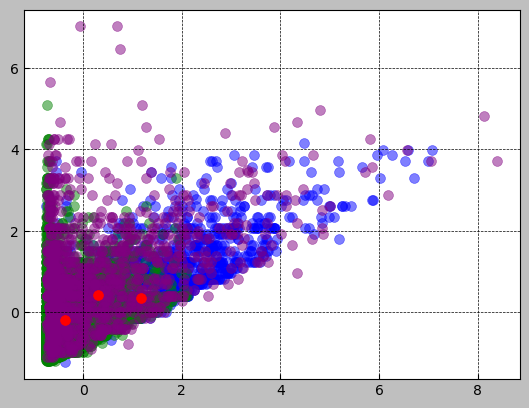

In [46]:
kmeans = KMeans(n_clusters = 3 , random_state = 42).fit(scaled_features)           # model with 3 clusters
centroids = kmeans.cluster_centers_             # checking centroids
print (centroids)

colors = ['blue', 'green', 'purple']            # choosing colors for labels
centroid_color = 'red'                          # choosing colors for centroids

for i in range(kmeans.n_clusters):              # scattering samples splited by labels
    plt.scatter(scaled_features[:, 0][kmeans.labels_ == i], 
                scaled_features[:, 12][kmeans.labels_ == i], 
                c = colors[i], 
                s = 50, 
                alpha = 0.5)

plt.scatter(centroids[:,0], centroids[:,1], c = centroid_color, s = 50)   # scattering centroids
plt.show()

In [47]:
kmeansV = df.copy ()
kmeans = KMeans (n_clusters = 3 , random_state = 42)
kmeans.fit (scaled_features)
kmeansV ['cluster'] = kmeans.predict (scaled_features)

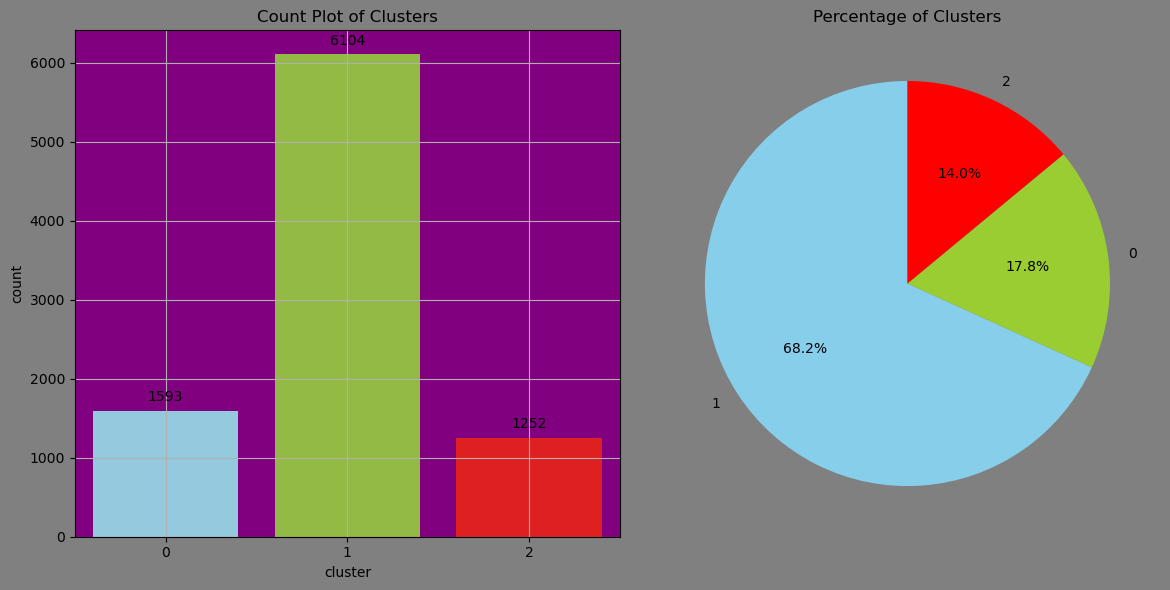

In [48]:
plot2 (kmeansV)

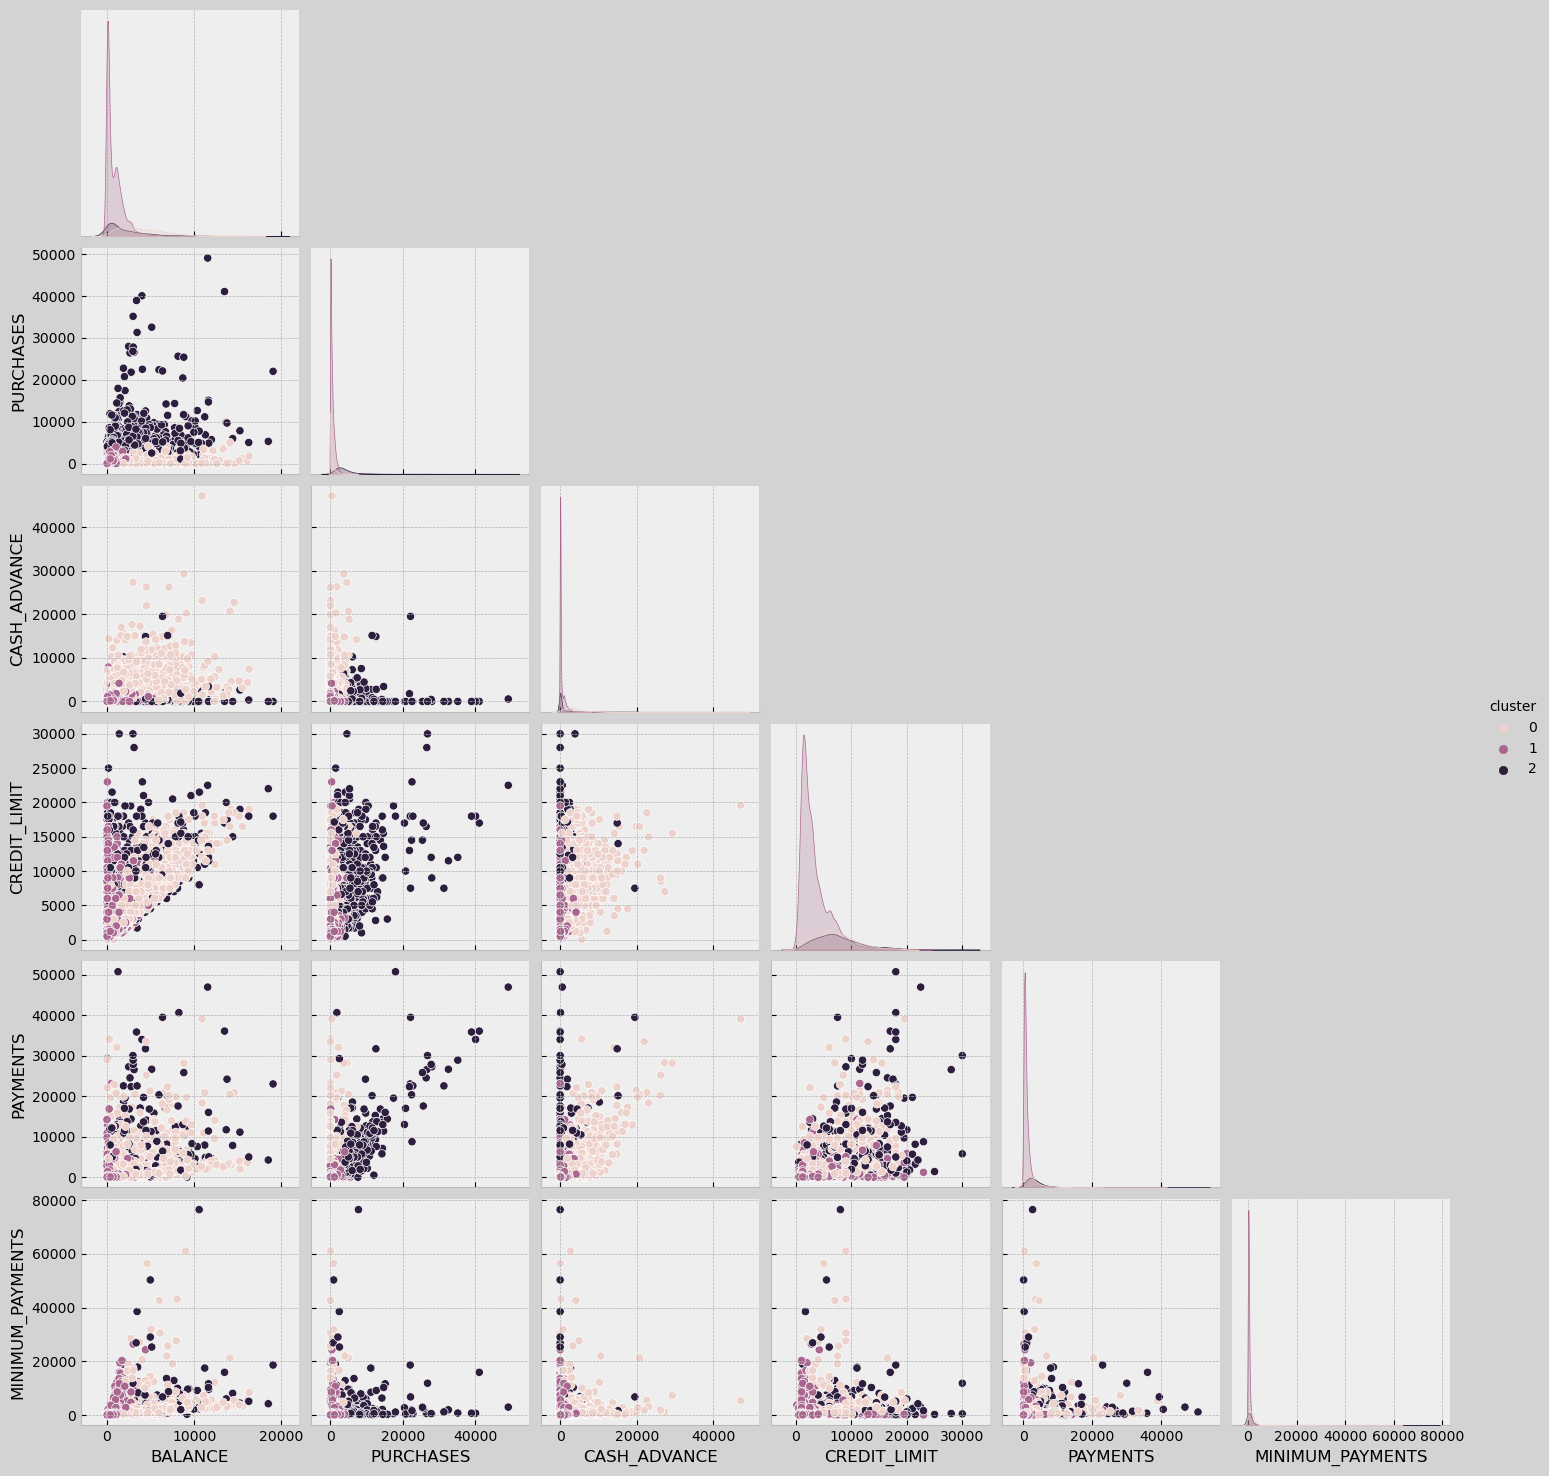

In [49]:
plot3 (kmeansV)

# <div style="padding: 10px; background-color:#215669; margin: 0; color:#D8C4E1 ; font-family: Gill Sans, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;">MiniBatchKMeans</div>

In [50]:
silhouette = []
calinski_harabasz = []
davies_bouldin = []
inertia = []
for k in range(2,11):
    MB = MiniBatchKMeans (n_clusters = k , random_state = 42)
    MB.fit (scaled_features)
    
    score = silhouette_score (scaled_features , MB.predict(scaled_features))
    silhouette.append (score)
    
    score1 = calinski_harabasz_score (scaled_features, MB.predict(scaled_features))
    calinski_harabasz.append(score1)
    
    score2 = davies_bouldin_score (scaled_features, MB.predict(scaled_features))
    davies_bouldin.append (score2)
    
    score3 = MB.inertia_
    inertia.append (score3)

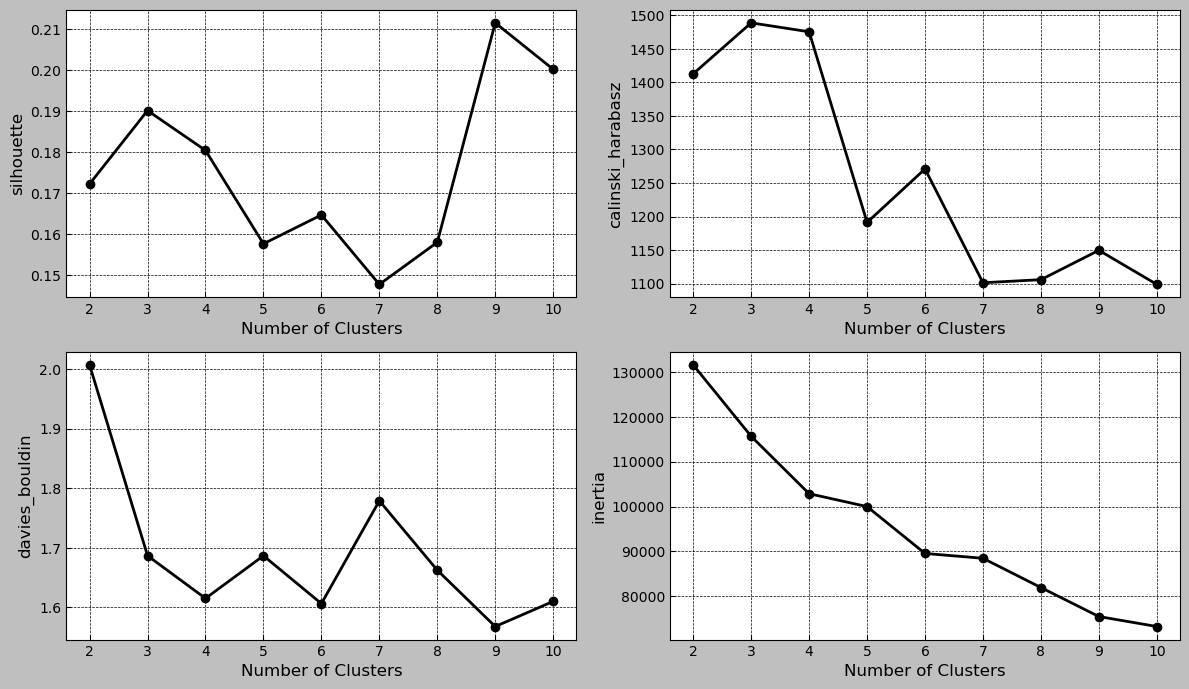

In [51]:
plt.style.use ('grayscale')
fig, axs = plt.subplots(2, 2, figsize=(12, 7))

metrics = {'silhouette': silhouette, 'calinski_harabasz': calinski_harabasz,
           'davies_bouldin': davies_bouldin , 'inertia': inertia}
metrics_list = list(metrics.items()) 

for i in range(2): 
    for j in range(2): 
        index = i*2 + j
        if index < len(metrics_list):
            metric_name, metric_values = metrics_list[i*2 + j] 
            axs[i, j].plot(range(2, 11), metric_values , marker = 'o')
            axs[i, j].set_xticks(range(2, 11))
            axs[i, j].set_xlabel('Number of Clusters')
            axs[i, j].set_ylabel(metric_name)
            axs[i, j].grid(True)

plt.tight_layout()
plt.show()

<div style = 'border : 3px solid non; background-color:#8F9AB3;padding:10px;color:#FFFFFF'>
    <p>silhouette => 3 is the best<p>
    <p>calinski_harabasz => 3 is the best<p>
    <p>davies_bouldin => 3 is good. 4 is better<p>
    <p>inertia => 3 is ok<p>
    <p>conclusion => becuase we have good score for 3 clusters and it has lowest cluster number with highest score in 2 impoertant metrics i dicided to choose this number for clusters.<p>

<div style = 'border : 3px solid non;text-align: center; background-color:#8F9AB3; padding:10px; color:#FFFFFF'>changing parameters for better clustering

<div style = 'border : 3px solid non; background-color:#8F9AB3;padding:10px;color:#FFFFFF'>
    <p>important parameters :<p>
    <p>init{‘k-means++’, ‘random’} , default=’k-means++’<p>
    <p>max_iter : int, default=100<p>
    <p>batch_size : int, default=1024<p>

In [52]:
MB = MiniBatchKMeans (n_clusters = 3 , random_state = 42)
MB.fit (scaled_features)
score = silhouette_score (scaled_features , MB.predict(scaled_features))
score

0.19010317340400956

In [53]:
MB = MiniBatchKMeans (n_clusters = 3 , random_state = 42 , init = 'random')
MB.fit (scaled_features)
score = silhouette_score (scaled_features , MB.predict(scaled_features))
score

0.19125188406867827

<div style = 'border : 3px solid non; background-color:#8F9AB3;padding:10px;color:#FFFFFF'>
    <p>random value for this parameter is better<p>

In [54]:
silhouette = []
max_iter_values = range(95, 106, 1)
for i in max_iter_values:
    MB = MiniBatchKMeans (n_clusters = 3 , random_state = 42 , init = 'random' , max_iter = i)
    MB.fit (scaled_features)
    score = silhouette_score(scaled_features, MB.predict(scaled_features))
    silhouette.append(score)


df_silhouette = pd.DataFrame(silhouette, columns=['silhouette_score'])
df_max_iter = pd.DataFrame(max_iter_values, columns=['max_iter'])
result = pd.concat([df_max_iter, df_silhouette], axis=1)
result

max_iter  silhouette_score
0         95          0.191252
1         96          0.191252
2         97          0.191252
3         98          0.191252
4         99          0.191252
5        100          0.191252
6        101          0.191252
7        102          0.191252
8        103          0.191252
9        104          0.191252
10       105          0.191252

<div style = 'border : 3px solid non; background-color:#8F9AB3;padding:10px;color:#FFFFFF'>
    <p>no changes<p>

In [55]:
'''silhouette = []
batch_size_values = range(950, 1050, 1)
for i in batch_size_values:
    MB = MiniBatchKMeans (n_clusters = 3 , random_state = 42 , init = 'random' , batch_size = i)
    MB.fit (scaled_features)
    score = silhouette_score(scaled_features, MB.predict(scaled_features))
    silhouette.append(score)


df_silhouette = pd.DataFrame(silhouette, columns=['silhouette_score'])
df_batch_size = pd.DataFrame(batch_size_values, columns=['batch_size'])
result = pd.concat([df_batch_size, df_silhouette], axis=1)
result'''

"silhouette = []\nbatch_size_values = range(950, 1050, 1)\nfor i in batch_size_values:\n    MB = MiniBatchKMeans (n_clusters = 3 , random_state = 42 , init = 'random' , batch_size = i)\n    MB.fit (scaled_features)\n    score = silhouette_score(scaled_features, MB.predict(scaled_features))\n    silhouette.append(score)\n\n\ndf_silhouette = pd.DataFrame(silhouette, columns=['silhouette_score'])\ndf_batch_size = pd.DataFrame(batch_size_values, columns=['batch_size'])\nresult = pd.concat([df_batch_size, df_silhouette], axis=1)\nresult"

In [56]:
silhouette = []
batch_size_values = range(1010, 1030, 1)
for i in batch_size_values:
    MB = MiniBatchKMeans (n_clusters = 3 , random_state = 42 , init = 'random' , batch_size = i)
    MB.fit (scaled_features)
    score = silhouette_score(scaled_features, MB.predict(scaled_features))
    silhouette.append(score)


df_silhouette = pd.DataFrame(silhouette, columns=['silhouette_score'])
df_batch_size = pd.DataFrame(batch_size_values, columns=['batch_size'])
result = pd.concat([df_batch_size, df_silhouette], axis=1)
result

batch_size  silhouette_score
0         1010          0.212701
1         1011          0.200046
2         1012          0.271541
3         1013          0.177573
4         1014          0.198546
5         1015          0.205645
6         1016          0.184632
7         1017          0.148499
8         1018          0.135609
9         1019          0.197456
10        1020          0.172938
11        1021          0.180312
12        1022          0.163813
13        1023          0.197032
14        1024          0.191252
15        1025          0.171984
16        1026          0.204260
17        1027          0.251502
18        1028          0.200696
19        1029          0.205064

In [57]:
max_score = result.loc[result['silhouette_score'].idxmax()]
max_score

batch_size          1012.000000
silhouette_score       0.271541
Name: 2, dtype: float64

<div style = 'border : 3px solid non; background-color:#8F9AB3;padding:10px;color:#FFFFFF'>
    <p>score increased<p>

In [58]:
# default values for parameters
MB = MiniBatchKMeans (n_clusters = 3 , random_state = 42 )
MB.fit (scaled_features)
    
print ('silhouette_score : ' , silhouette_score (scaled_features , MB.predict(scaled_features)))
print ('calinski_harabasz_score : ' , calinski_harabasz_score (scaled_features, MB.predict(scaled_features)))
print ('davies_bouldin_score : ' , davies_bouldin_score (scaled_features, MB.predict(scaled_features)))
print ('inertia : ' , MB.inertia_)

silhouette_score :  0.19010317340400956
calinski_harabasz_score :  1488.7572366136735
davies_bouldin_score :  1.6867363724885698
inertia :  115656.7808163125


In [59]:

MB = MiniBatchKMeans (n_clusters = 3 , random_state = 42 , init = 'random' , batch_size = 1012)
MB.fit (scaled_features)
    
print ('silhouette_score : ' , silhouette_score (scaled_features , MB.predict(scaled_features)))
print ('calinski_harabasz_score : ' , calinski_harabasz_score (scaled_features, MB.predict(scaled_features)))
print ('davies_bouldin_score : ' , davies_bouldin_score (scaled_features, MB.predict(scaled_features)))
print ('inertia : ' , MB.inertia_)

silhouette_score :  0.27154093279479885
calinski_harabasz_score :  1556.1072076611213
davies_bouldin_score :  1.5439523952885754
inertia :  113093.81824668098


<div style = 'border : 3px solid non; background-color:#8F9AB3;padding:10px;color:#FFFFFF'>
    <p>new parameter values are better in metric scores<p>

<div style = 'border : 3px solid non;text-align: center; background-color:#8F9AB3; padding:10px; color:#FFFFFF'>going to visualize sample labels (clustering by MiniBatchKMeans)

[[ 1.24935496  0.35492226 -0.26206371 -0.18837934 -0.27360991  1.51611381
  -0.59379297 -0.26144348 -0.5161517   1.67734039  1.4939456  -0.32208758
   0.67781583  0.49524396  0.41341725 -0.40219586 -0.11672369]
 [ 0.70020378  0.45654138  2.67861525  2.27576495  2.15221419 -0.1873306
   1.15868837  1.79325759  1.08450181 -0.34634315 -0.21764298  2.73020966
   1.32149427  1.62298221  0.33940841  0.56496815  0.31548646]
 [-0.31872117 -0.1135443  -0.15743746 -0.14289472 -0.10978811 -0.29535418
   0.02557824 -0.09048351  0.01652686 -0.31159595 -0.28427562 -0.14338491
  -0.24838204 -0.22651558 -0.11484307  0.04590753  0.00631153]]


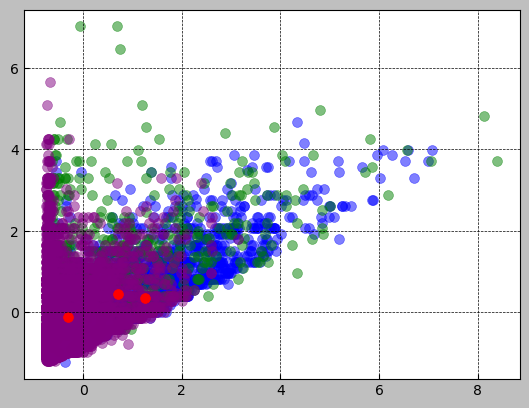

In [60]:
MB = MiniBatchKMeans (n_clusters = 3 , random_state = 42 , init = 'random' , batch_size = 1012)
MB.fit (scaled_features)
centroids = MB.cluster_centers_            
print (centroids)

colors = ['blue', 'green', 'purple']       
centroid_color = 'red'                         

for i in range(MB.n_clusters):            
    plt.scatter(scaled_features[:, 0][MB.labels_ == i], 
                scaled_features[:, 12][MB.labels_ == i], 
                c = colors[i], 
                s = 50, 
                alpha = 0.5)

plt.scatter(centroids[:,0], centroids[:,1], c = centroid_color, s = 50)   
plt.show()

In [61]:
MBV = df.copy ()
MB = MiniBatchKMeans (n_clusters = 3 , random_state = 42 , init = 'random' , batch_size = 1012)
MB.fit (scaled_features)
MBV ['cluster'] = MB.predict (scaled_features)

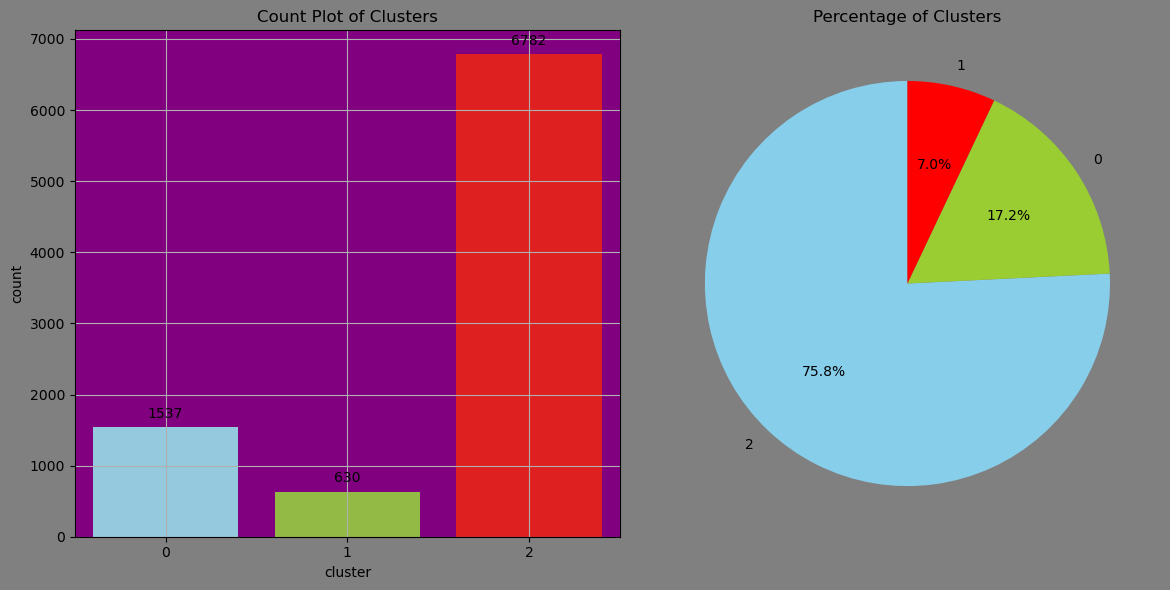

In [62]:
plot2 (MBV)

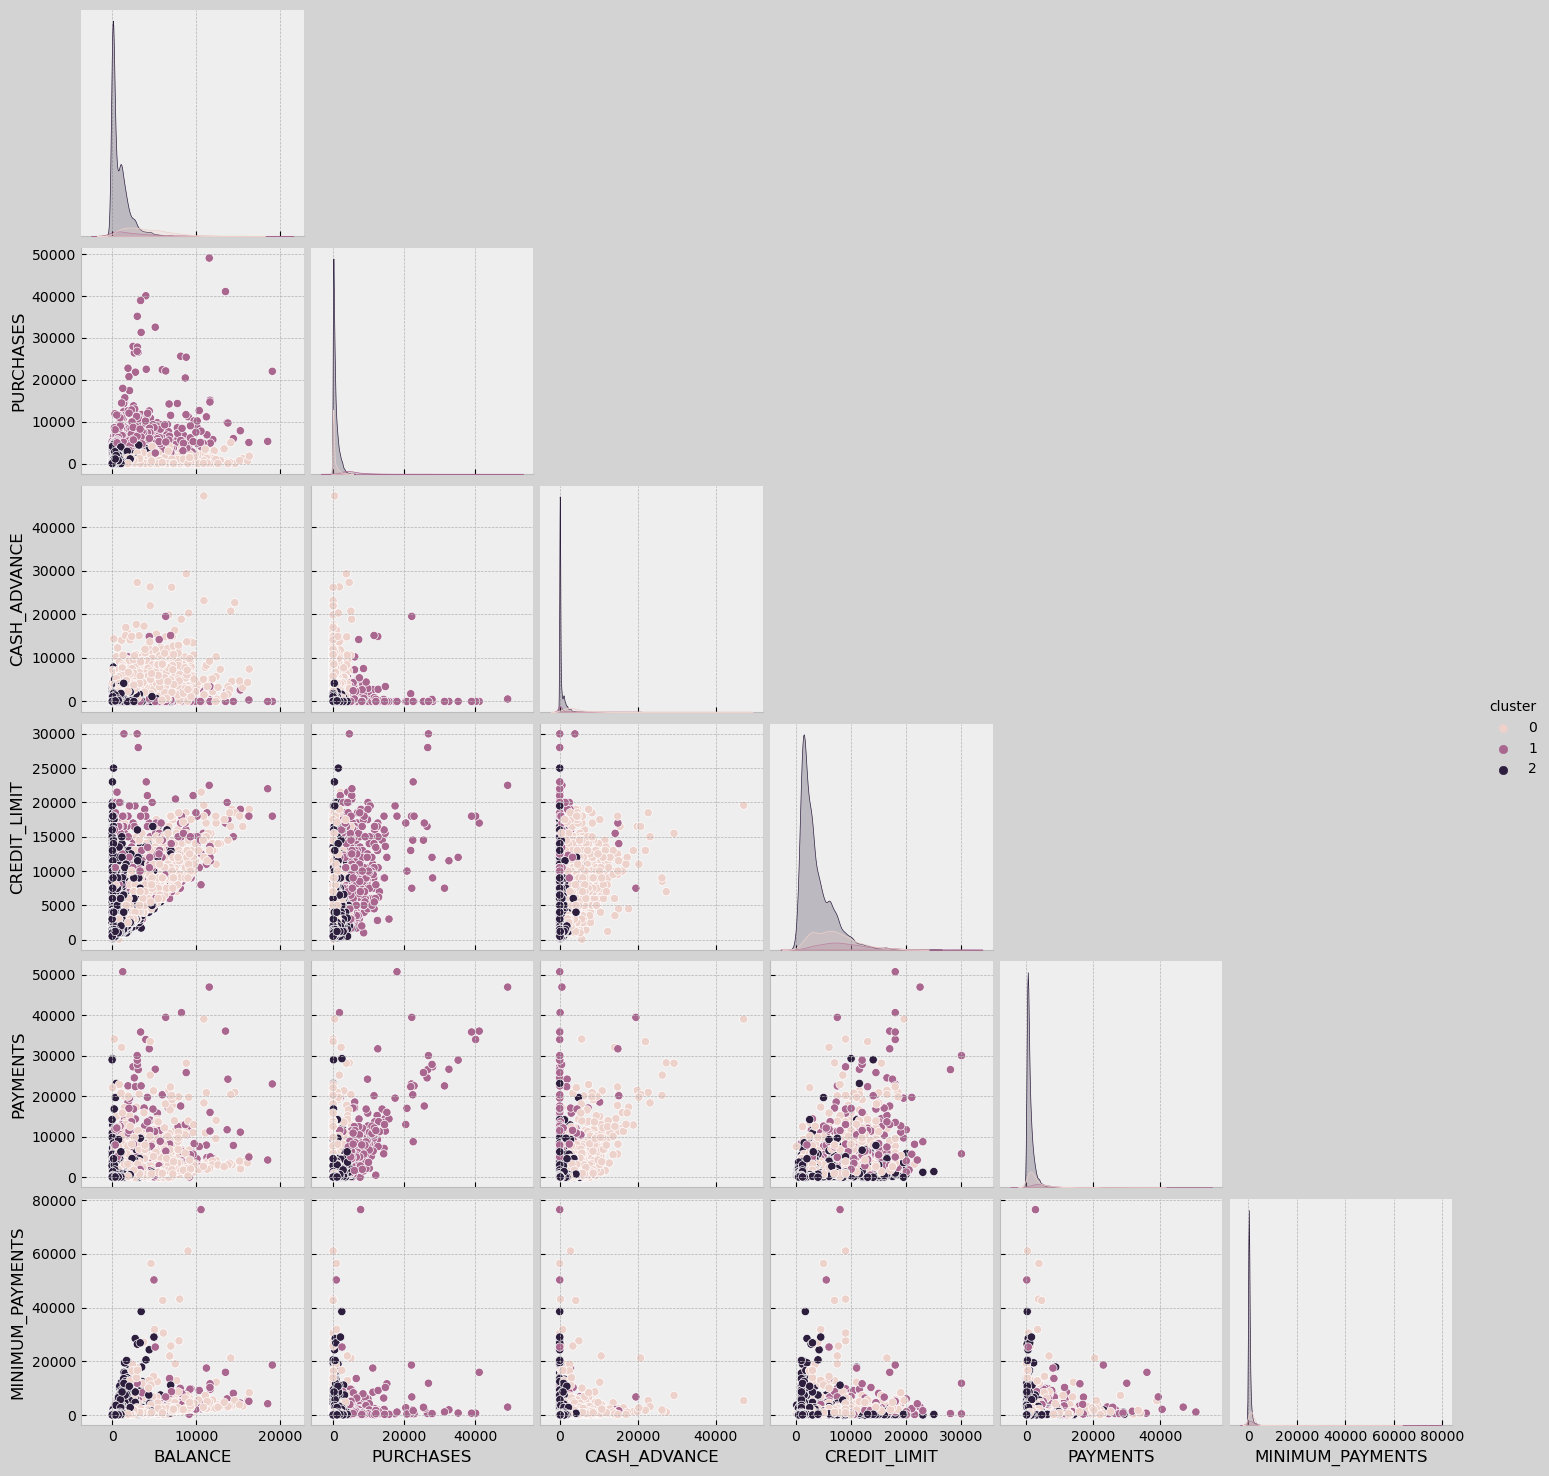

In [63]:
plot3 (MBV)

# <div style="padding: 10px; background-color:#215669; margin: 0; color:#D8C4E1 ; font-family: Gill Sans, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;">AffinityPropagation</div>

In [64]:
AP = AffinityPropagation (random_state = 42)
AP.fit (scaled_features)
labels = AP.labels_

In [65]:
labels

array([177, 213,  14, ..., 179, 339, 369], dtype=int64)

In [66]:
set (labels)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [67]:
len (set (labels))

373

In [68]:
AP = AffinityPropagation (random_state = 42 , damping = .9)
AP.fit (scaled_features)
labels2 = AP.labels_

In [69]:
len (set (labels2))

371

In [70]:
print ('silhouette_score : ' , silhouette_score (scaled_features , AP.predict(scaled_features)))
print ('calinski_harabasz_score : ' , calinski_harabasz_score (scaled_features, AP.predict(scaled_features)))
print ('davies_bouldin_score : ' , davies_bouldin_score (scaled_features, AP.predict(scaled_features)))

silhouette_score :  0.12866002388104536
calinski_harabasz_score :  233.61601681652044
davies_bouldin_score :  1.2391167844304816


<div style = 'border : 3px solid non; background-color:#8F9AB3;padding:10px;color:#FFFFFF'>
    <p>There is no way to set the number of clusters in this algorithm.<p>
    <p>Also the number of clusters that it sets for our data is very irrational<p>
    <p>and metrics have very bad scores either.<p>
    <p>so this algorithm isn't useful for us<p>

# <div style="padding: 10px; background-color:#215669; margin: 0; color:#D8C4E1 ; font-family: Gill Sans, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;">MeanShift</div>

<div style = 'border : 3px solid non; background-color:#8F9AB3;padding:10px;color:#FFFFFF'>
    <p>Mean-shift clustering is a non-parametric, density-based clustering algorithm that can be used to identify clusters in a dataset. It is particularly useful for datasets where the clusters have arbitrary shapes and are not well-separated by linear boundaries.<p>

In [71]:
MS = MeanShift ()
MS.fit (scaled_features)
labels = MS.labels_

In [72]:
len (set (labels))

79

In [73]:
silhouette = []
calinski_harabasz = []
davies_bouldin = []

for k in range(10,15):
    MS = MeanShift (bandwidth = k , n_jobs = -1)
    MS.fit (scaled_features)
    score = silhouette_score (scaled_features , MS.predict(scaled_features))
    silhouette.append (score)
    score1 = calinski_harabasz_score (scaled_features, MS.predict(scaled_features))
    calinski_harabasz.append(score1)
    score2 = davies_bouldin_score (scaled_features, MS.predict(scaled_features))
    davies_bouldin.append (score2)

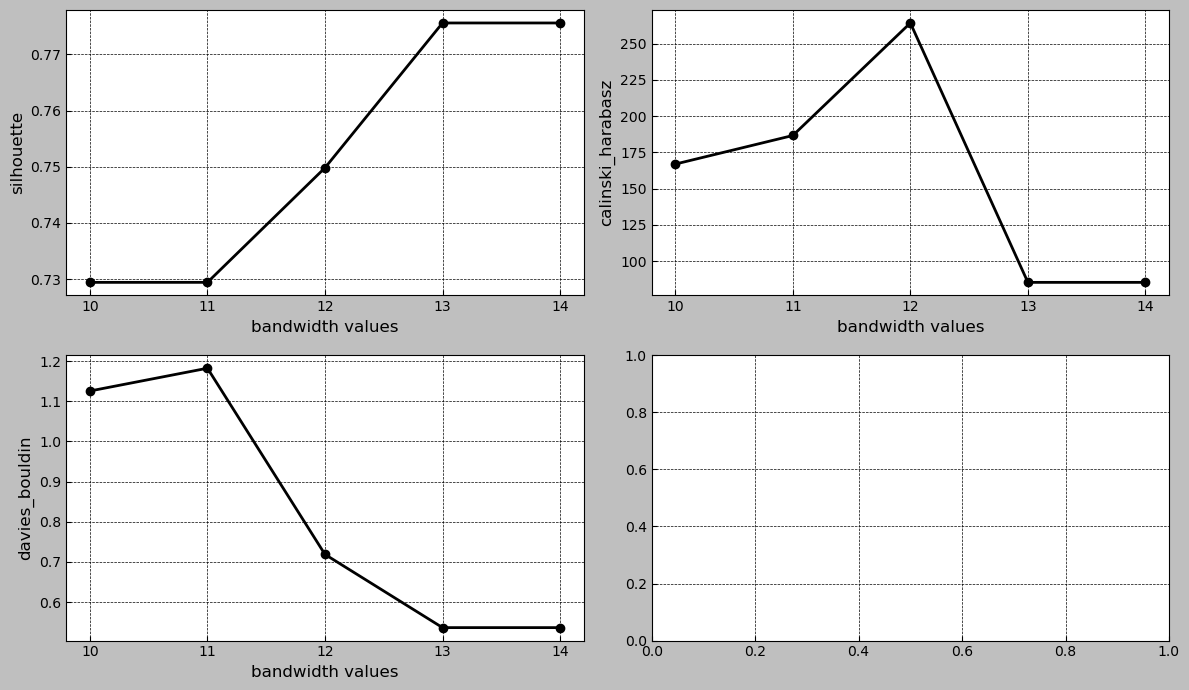

In [74]:
plt.style.use ('grayscale')
fig, axs = plt.subplots(2, 2, figsize=(12, 7)) 

metrics = {'silhouette': silhouette, 'calinski_harabasz': calinski_harabasz,
           'davies_bouldin': davies_bouldin}
metrics_list = list(metrics.items()) 

for i in range(2): 
    for j in range(2): 
        index = i*2 + j
        if index < len(metrics_list):
            metric_name, metric_values = metrics_list[i*2 + j] 
            axs[i, j].plot(range(10, 15), metric_values , marker = 'o')
            axs[i, j].set_xticks(range(10, 15))
            axs[i, j].set_xlabel('bandwidth values')
            axs[i, j].set_ylabel(metric_name)
            axs[i, j].grid(True)

plt.tight_layout()
plt.show()

<div style = 'border : 3px solid non;text-align: center; background-color:#8F9AB3; padding:10px; color:#FFFFFF'>checking with 12 and 13 bandwidth

In [75]:
MS = MeanShift (bandwidth = 13 , n_jobs = -1)
MS.fit (scaled_features)
labels = MS.labels_
len (set (labels))

2

[[-1.51288248e-02 -2.73291229e-03 -4.31034690e-02 -3.74211271e-02
  -3.31501957e-02 -1.63083960e-02 -4.22959608e-03 -6.71661578e-03
  -4.48494249e-03 -4.01920297e-03 -1.56350902e-02 -2.42169929e-02
  -1.63337583e-02 -4.19323988e-02 -2.76621613e-02 -3.40221075e-03
  -2.09197319e-03]
 [ 4.48741346e+00  5.17980178e-01 -2.67427068e-01 -2.76528816e-01
  -1.24604811e-01  2.20100206e+01  2.31545048e-01  1.59286527e-01
   3.40996501e-01  4.32167960e+00  1.75469373e+01  2.52986390e-01
   4.15145908e+00  1.28895264e+01  1.95011111e+00 -5.25588445e-01
   3.60541282e-01]]


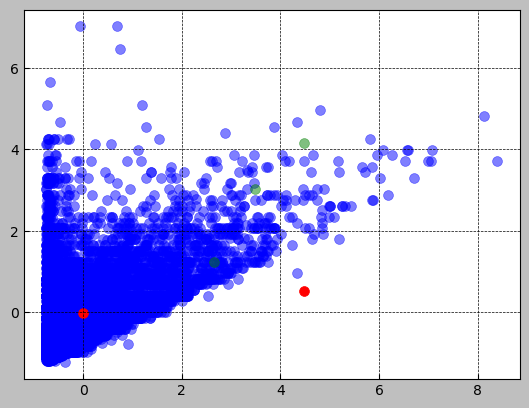

In [76]:
centroids = MS.cluster_centers_             # checking centroids
print (centroids)

colors = ['blue', 'green']            # choosing colors for labels
centroid_color = 'red'                          # choosing colors for centroids

for i in range(2):              # scattering samples splited by labels
    plt.scatter(scaled_features[:, 0][MS.labels_ == i], 
                scaled_features[:, 12][MS.labels_ == i], 
                c = colors[i], 
                s = 50, 
                alpha = 0.5)

plt.scatter(centroids[:,0], centroids[:,1], c = centroid_color, s = 50)   # scattering centroids
plt.show()

In [77]:
MSV = df.copy ()
MSV ['cluster'] = MS.predict (scaled_features)

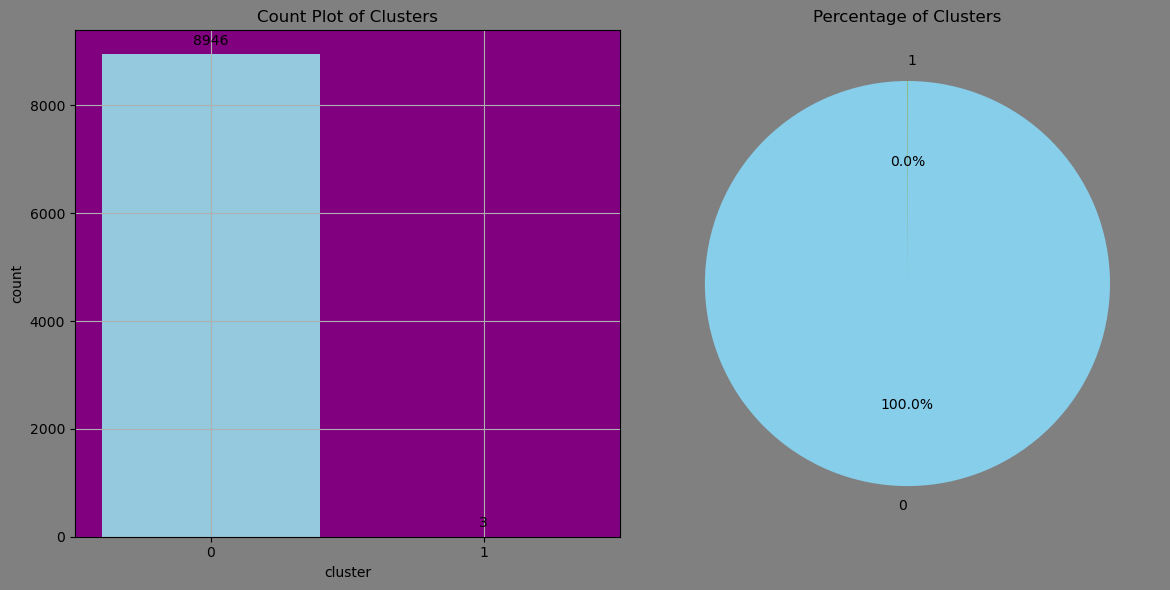

In [78]:
plot2 (MSV)

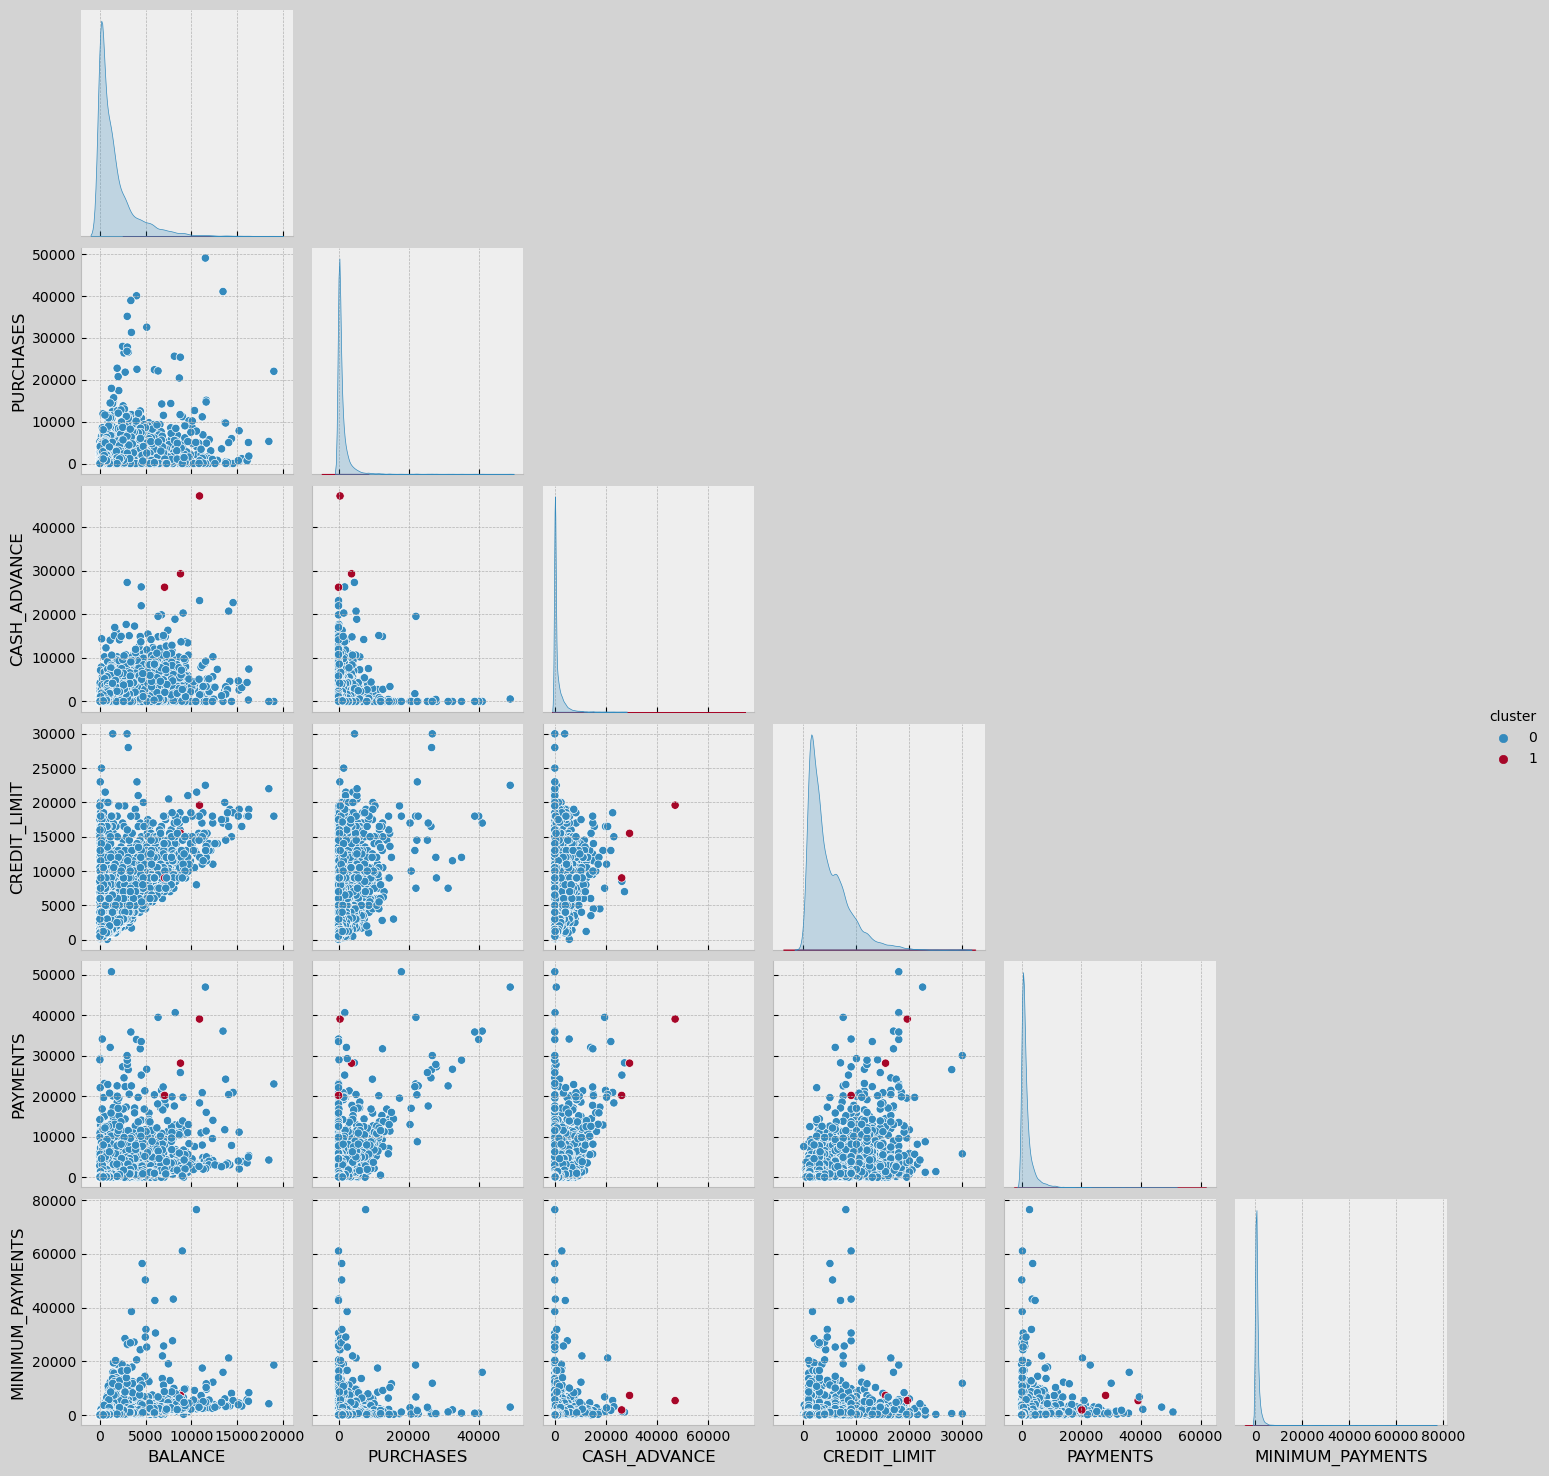

In [79]:
plot3 (MSV)

In [80]:
MS = MeanShift (bandwidth = 12 , n_jobs = -1)
MS.fit (scaled_features)
labels = MS.labels_
len (set (labels))

5

[[-1.84955727e-02 -3.05387810e-03 -4.71983014e-02 -4.10836098e-02
  -3.61017501e-02 -2.22349991e-02 -4.98922487e-03 -8.71587993e-03
  -5.28546541e-03 -5.56817628e-03 -1.90134492e-02 -3.00698934e-02
  -1.96399537e-02 -5.04966510e-02 -3.22785945e-02 -4.16253972e-03
  -2.32203277e-03]
 [ 4.48741346e+00  5.17980178e-01 -2.67427068e-01 -2.76528816e-01
  -1.24604811e-01  2.20100206e+01  2.31545048e-01  1.59286527e-01
   3.40996501e-01  4.32167960e+00  1.75469373e+01  2.52986390e-01
   4.15145908e+00  1.28895264e+01  1.95011111e+00 -5.25588445e-01
   3.60541282e-01]
 [ 4.32712140e+00  5.17980178e-01  3.15273630e+00 -3.56956505e-01
   8.10366268e+00 -4.66805398e-01  1.26974167e+00 -6.78716191e-01
   1.59908251e+00 -6.75294462e-01 -4.76082931e-01  1.17827301e+00
   9.63430603e-01  3.29916545e-01  3.23911248e+01 -5.25588445e-01
   3.60541282e-01]
 [ 1.19918392e+00 -6.33812170e-01  1.00611242e+01 -3.56956505e-01
   2.44257552e+01 -4.66805398e-01  2.39067199e-02 -6.78716191e-01
   1.31316337e-01 -

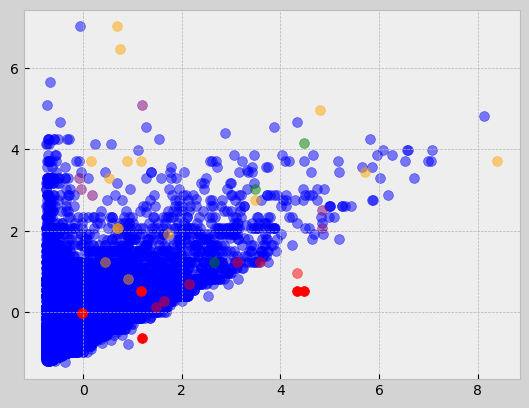

In [81]:
centroids = MS.cluster_centers_             # checking centroids
print (centroids)

colors = ['blue', 'green' , 'red' , 'purple' , 'orange']            # choosing colors for labels
centroid_color = 'red'                          # choosing colors for centroids

for i in range(5):              # scattering samples splited by labels
    plt.scatter(scaled_features[:, 0][MS.labels_ == i], 
                scaled_features[:, 12][MS.labels_ == i], 
                c = colors[i], 
                s = 50, 
                alpha = 0.5)

plt.scatter(centroids[:,0], centroids[:,1], c = centroid_color, s = 50)   # scattering centroids
plt.show()

In [82]:
MSV2 = df.copy ()
MSV2 ['cluster'] = MS.predict (scaled_features)

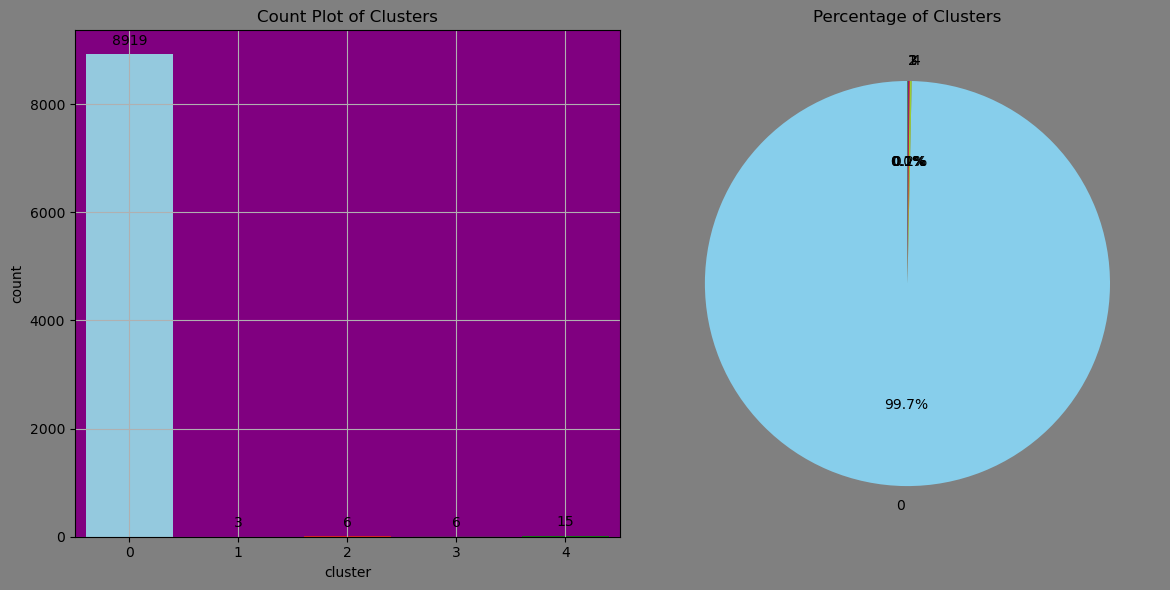

In [83]:
plot2 (MSV2)

<div style = 'border : 3px solid non; background-color:#8F9AB3;padding:10px;color:#FFFFFF'>
    <p>this algorithm is not useful in this kind of data set with this shape of disturbution as you can see the clustering doesnt make any sense<p>

# <div style="padding: 10px; background-color:#215669; margin: 0; color:#D8C4E1 ; font-family: Gill Sans, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;">Hierarchical (AgglomerativeClustering)</div>

In [84]:
silhouette = []
calinski_harabasz = []
davies_bouldin = []
for k in range(2,11):
    AG = AgglomerativeClustering (n_clusters = k)
    AG.fit (scaled_features)
    
    score = silhouette_score (scaled_features , AG.fit_predict(scaled_features))
    silhouette.append (score)
    
    score1 = calinski_harabasz_score (scaled_features, AG.fit_predict(scaled_features))
    calinski_harabasz.append(score1)
    
    score2 = davies_bouldin_score (scaled_features, AG.fit_predict(scaled_features))
    davies_bouldin.append (score2)

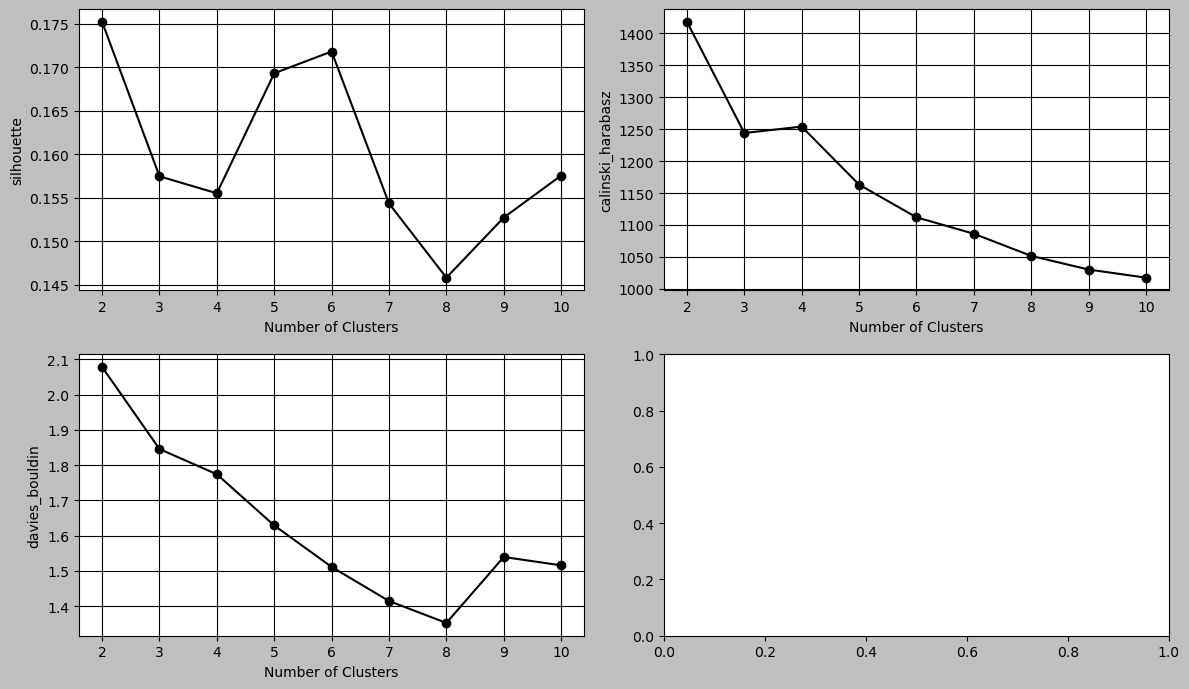

In [85]:
plt.style.use ('grayscale')
fig, axs = plt.subplots(2, 2, figsize=(12, 7))

metrics = {'silhouette': silhouette, 'calinski_harabasz': calinski_harabasz,
           'davies_bouldin': davies_bouldin}
metrics_list = list(metrics.items()) 

for i in range(2): 
    for j in range(2): 
        index = i*2 + j
        if index < len(metrics_list):
            metric_name, metric_values = metrics_list[i*2 + j] 
            axs[i, j].plot(range(2, 11), metric_values , marker = 'o')
            axs[i, j].set_xticks(range(2, 11))
            axs[i, j].set_xlabel('Number of Clusters')
            axs[i, j].set_ylabel(metric_name)
            axs[i, j].grid(True)

plt.tight_layout()
plt.show()

<div style = 'border : 3px solid non; background-color:#8F9AB3;padding:10px;color:#FFFFFF'>
    <p>number 2 has good scores in silhouette and calinski_harabasz metrics<p>

<div style = 'border : 3px solid non;text-align: center; background-color:#8F9AB3; padding:10px; color:#FFFFFF'>changing parameters for better clustering

<div style = 'border : 3px solid non; background-color:#8F9AB3;padding:10px;color:#FFFFFF'>
    <p>important parameters :<p>
    <p>linkage{‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward’<p>

In [86]:
silhouette = []
linkage_values = ['ward' , 'complete', 'average', 'single']
for i in linkage_values:
    AG = AgglomerativeClustering (n_clusters = 2 , linkage = i)
    AG.fit (scaled_features)
    score = silhouette_score(scaled_features, AG.fit_predict(scaled_features))
    silhouette.append(score)


df_silhouette = pd.DataFrame(silhouette, columns=['silhouette_score'])
df_linkage = pd.DataFrame(linkage_values, columns=['linkage'])
result = pd.concat([df_linkage, df_silhouette], axis=1)
result

linkage  silhouette_score
0      ward          0.175247
1  complete          0.786548
2   average          0.840808
3    single          0.840808

In [87]:
silhouette = []
calinski_harabasz = []
davies_bouldin = []
linkage_values = ['ward' , 'complete', 'average', 'single']
for i in linkage_values:
    AG = AgglomerativeClustering (n_clusters = 2 , linkage = i)
    AG.fit (scaled_features)
    score = silhouette_score(scaled_features, AG.fit_predict(scaled_features))
    silhouette.append(score)
    score1 = calinski_harabasz_score (scaled_features, AG.fit_predict(scaled_features))
    calinski_harabasz.append(score1)
    score2 = davies_bouldin_score (scaled_features, AG.fit_predict(scaled_features))
    davies_bouldin.append (score2)
    
    

df_silhouette = pd.DataFrame(silhouette, columns=['silhouette_score'])
df_calinski_harabasz = pd.DataFrame(calinski_harabasz, columns=['calinski_harabasz'])
df_davies_bouldin = pd.DataFrame(davies_bouldin , columns=['davies_bouldin'])
df_linkage = pd.DataFrame(linkage_values, columns=['linkage'])

result = pd.concat([df_linkage, df_silhouette , df_calinski_harabasz , df_davies_bouldin], axis=1)
result

linkage  silhouette_score  calinski_harabasz  davies_bouldin
0      ward          0.175247        1418.186804        2.078235
1  complete          0.786548         698.307597        0.590252
2   average          0.840808          60.363986        0.110283
3    single          0.840808          60.363986        0.110283

<div style = 'border : 3px solid non; background-color:#8F9AB3;padding:10px;color:#FFFFFF'>
    <p>we have better calinski_harabasz and davies_bouldin scores with all linkage values except 'ward'<p>
    <p>but ward value clusters better and seprates the data much better.<p>

<div style = 'border : 3px solid non;text-align: center; background-color:#8F9AB3; padding:10px; color:#FFFFFF'>going to visualize sample labels (clustering by AgglomerativeClustering)

In [88]:
AGV = df.copy ()
AG = AgglomerativeClustering (n_clusters = 2 , linkage = 'ward')
AG.fit (scaled_features)
AGV ['cluster'] = AG.fit_predict (scaled_features)

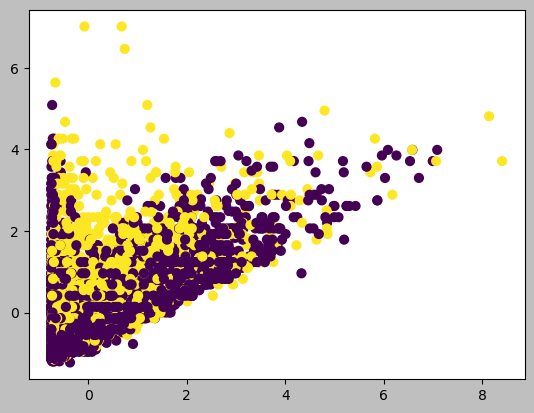

In [89]:
plot1 (AG)

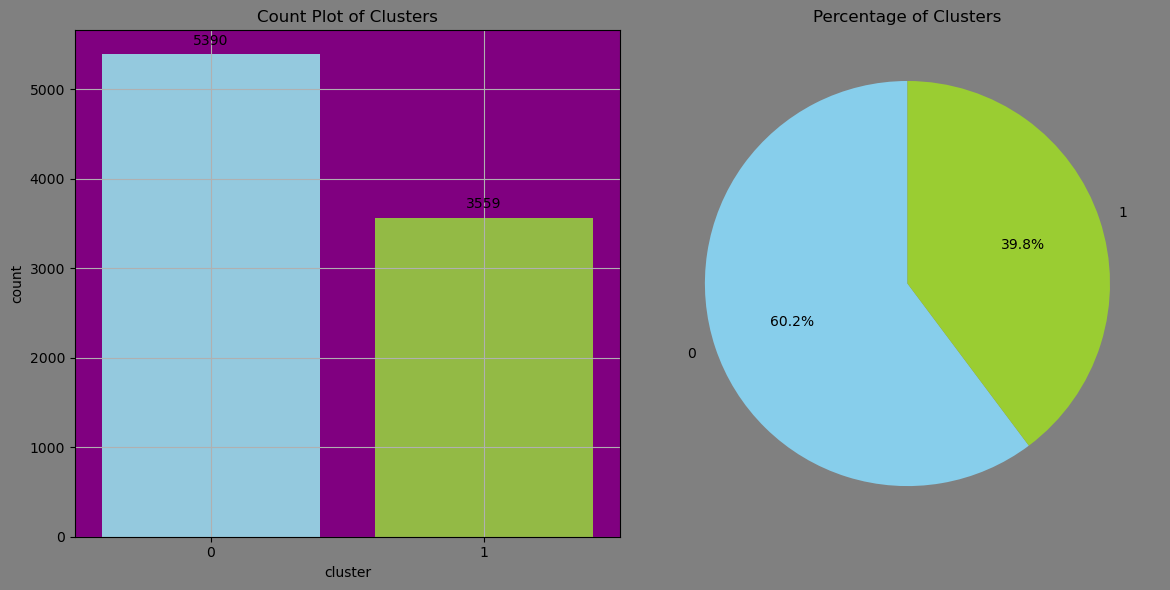

In [90]:
plot2 (AGV)

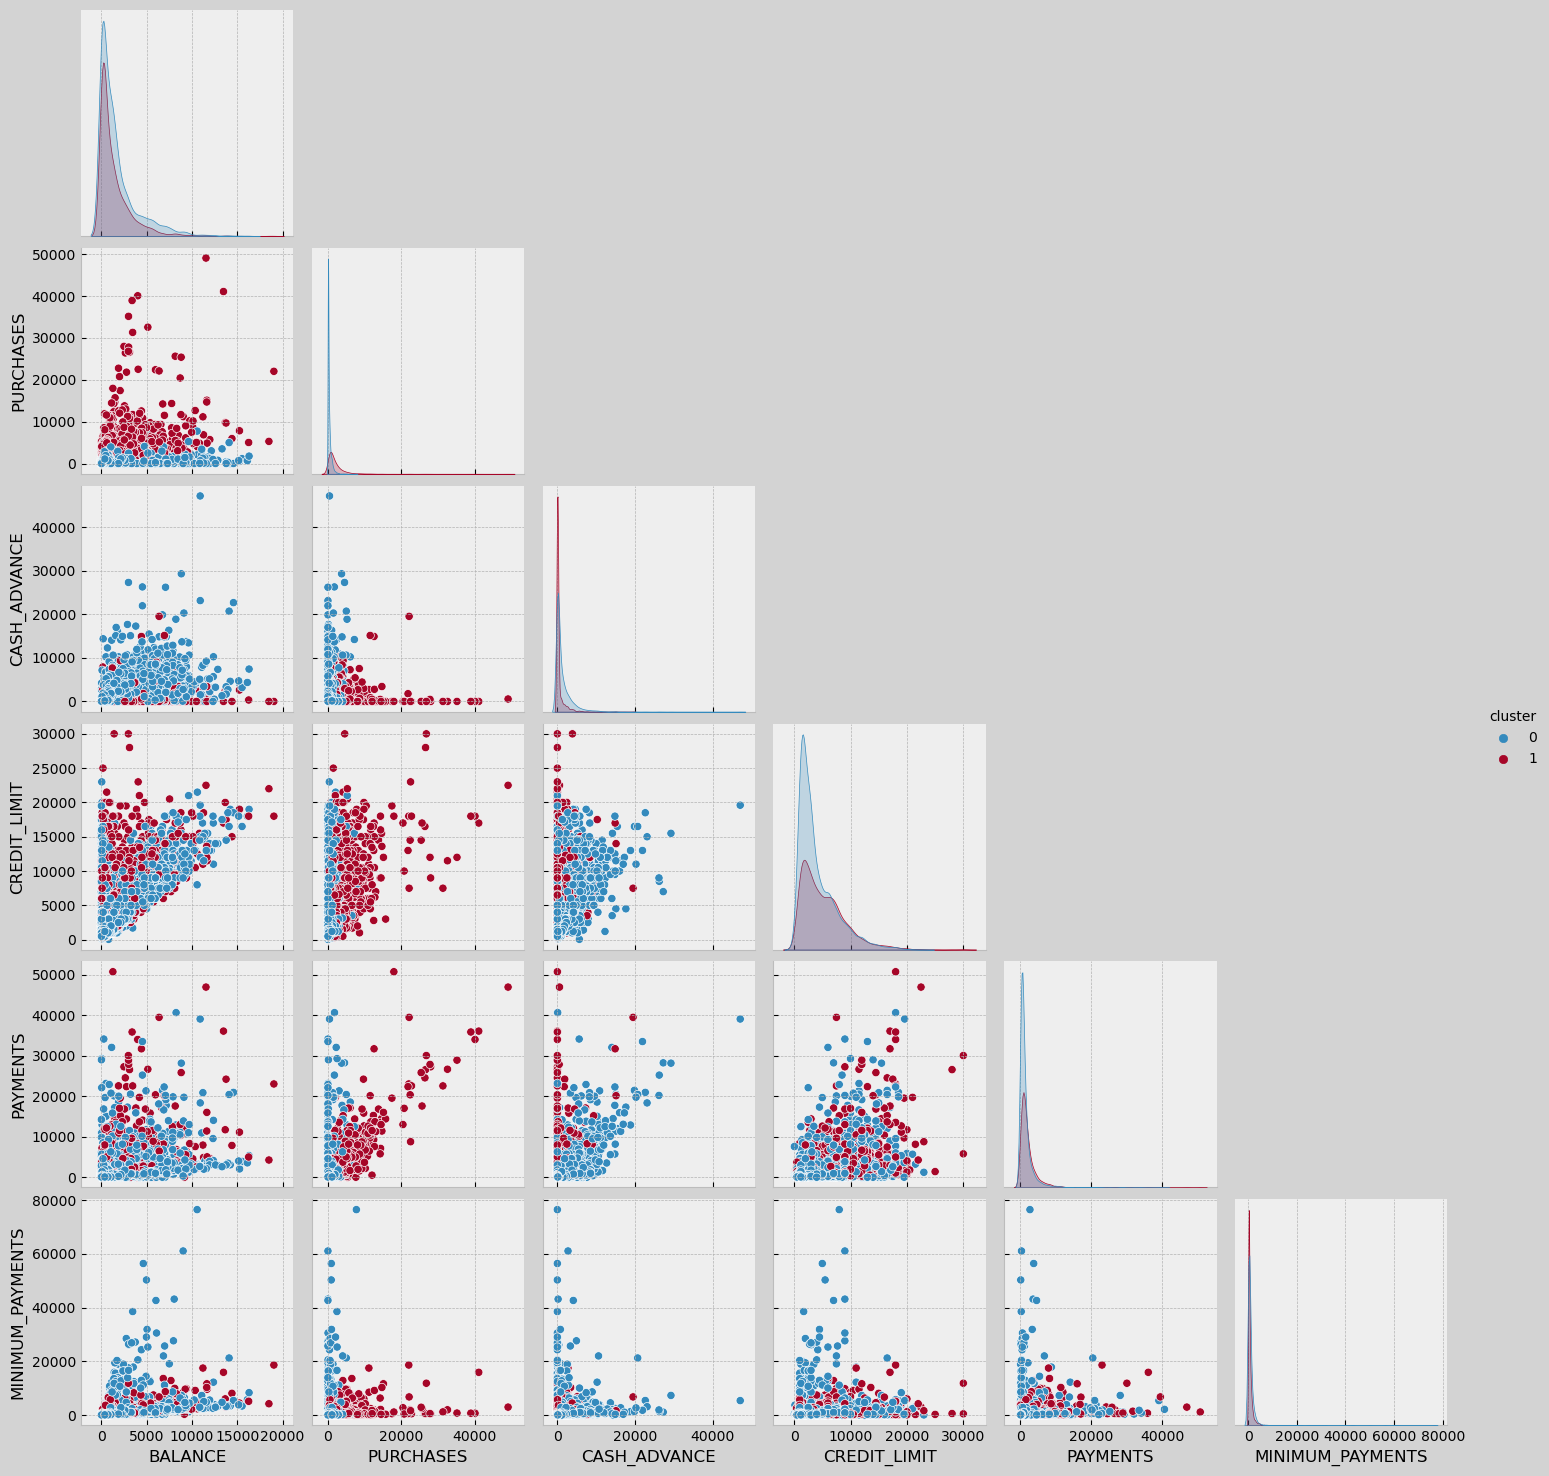

In [91]:
plot3 (AGV)

# <div style="padding: 10px; background-color:#215669; margin: 0; color:#D8C4E1 ; font-family: Gill Sans, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;">DBSCAN</div>

<div style = 'border : 3px solid non; background-color:#8F9AB3;padding:10px;color:#FFFFFF'>
    <p>The worst case memory complexity of DBSCAN is O({n}^2) , which can occur when the eps param is large and min_samples is low.<p>

<div style = 'border : 3px solid non; background-color:#8F9AB3;padding:10px;color:#FFFFFF'>
    <p>i want to check ranges of eps and min_samples scores.<p>
    <p>eps = 1 to 2<p>
    <p>min_samples = 9 to 14<p>

In [92]:
silhouette = []
calinski_harabasz = []
davies_bouldin = []
eps_values = []
min_samples_values = []
for eps in range (10 , 20):
    eps = eps / 10
    for min_samples in range (9 , 15):
        DB = DBSCAN (eps = eps , min_samples = min_samples , n_jobs = -1)
        DB.fit (scaled_features)
        
        eps_values.append(eps)
        min_samples_values.append(min_samples)
        score = silhouette_score (scaled_features , DB.fit_predict(scaled_features))
        silhouette.append (score)
        score1 = calinski_harabasz_score (scaled_features, DB.fit_predict(scaled_features))
        calinski_harabasz.append(score1)
        score2 = davies_bouldin_score (scaled_features, DB.fit_predict(scaled_features))
        davies_bouldin.append (score2)
        
df_eps = pd.DataFrame(eps_values, columns=['eps'])
df_min_samples = pd.DataFrame(min_samples_values, columns=['min_samples'])    
df_silhouette = pd.DataFrame(silhouette, columns=['silhouette_score'])
df_calinski_harabasz = pd.DataFrame(calinski_harabasz, columns=['calinski_harabasz'])
df_davies_bouldin = pd.DataFrame(davies_bouldin , columns=['davies_bouldin'])

result = pd.concat([df_eps, df_min_samples,df_silhouette , df_calinski_harabasz , df_davies_bouldin], axis=1)
result

eps  min_samples  silhouette_score  calinski_harabasz  davies_bouldin
0   1.0            9          0.052695         304.151872        2.021282
1   1.0           10          0.085337         309.769126        2.033577
2   1.0           11          0.103359         452.737713        2.304118
3   1.0           12          0.047265         299.352188        1.963921
4   1.0           13          0.046235         298.538844        1.962134
5   1.0           14         -0.011106         227.157464        1.832295
6   1.1            9         -0.121844         168.685141        1.903559
7   1.1           10         -0.102021         200.144574        1.880427
8   1.1           11         -0.112873         243.382860        2.067923
9   1.1           12          0.112416         473.701931        2.292841
10  1.1           13          0.114801         482.285245        2.289104
11  1.1           14          0.114838         483.294662        2.282516
12  1.2            9          0.121892         339.062654        2.049312
13  1.2           10          0.244825         993.961220        2.660868
14  1.2           11          0.014010         498.159379        2.423200
15  1.2           12          0.233826         972.489740        2.697517
16  1.2           13          0.128309         509.624075        2.268845
17  1.2           14          0.124974         502.443930        2.269386
18  1.3            9          0.172325         520.398168        2.262118
19  1.3           10          0.162185         514.665610        2.269808
20  1.3           11          0.155618         508.467080        2.283655
21  1.3           12          0.154802         508.722433        2.287090
22  1.3           13          0.133116         348.005771        2.043677
23  1.3           14          0.262093        1007.149956        2.632608
24  1.4            9          0.173275         526.247221        2.032480
25  1.4           10          0.303967        1039.206686        2.518161
26  1.4           11          0.299761        1030.754031        2.538808
27  1.4           12          0.296186        1026.003676        2.552062
28  1.4           13          0.176141         523.782776        2.243388
29  1.4           14          0.169400         521.878287        2.245395
30  1.5            9          0.340351        1042.282936        2.434433
31  1.5           10          0.336190        1042.437743        2.443222
32  1.5           11          0.332521        1046.954024        2.447980
33  1.5           12          0.328542        1039.249939        2.468368
34  1.5           13          0.325038        1042.456091        2.479111
35  1.5           14          0.321581        1033.036413        2.499631
36  1.6            9          0.321562         523.109635        2.008831
37  1.6           10          0.364032        1024.985261        2.398035
38  1.6           11          0.360480        1034.072139        2.401521
39  1.6           12          0.356538        1039.347608        2.405715
40  1.6           13          0.353603        1034.805119        2.419861
41  1.6           14          0.350459        1030.016146        2.436413
42  1.7            9          0.338193         521.198192        1.977170
43  1.7           10          0.336308         522.880312        1.980886
44  1.7           11          0.389603        1026.801370        2.326337
45  1.7           12          0.385293        1024.333059        2.344009
46  1.7           13          0.383587        1037.749998        2.336613
47  1.7           14          0.380349        1039.326682        2.346903
48  1.8            9          0.419133        1001.810485        2.250236
49  1.8           10          0.415355        1003.658469        2.258669
50  1.8           11          0.412449        1020.274205        2.260459
51  1.8           12          0.410148        1033.906491        2.262435
52  1.8           13          0.407712        1036.489868        2.269826
53  1.8 

In [93]:
top_5_silhouette_score = result.nlargest(5, 'silhouette_score')
top_5_silhouette_score

eps  min_samples  silhouette_score  calinski_harabasz  davies_bouldin
54  1.9            9          0.442979         992.317516        2.192842
55  1.9           10          0.437311        1004.255934        2.200275
56  1.9           11          0.434771        1008.244757        2.205673
57  1.9           12          0.433885        1011.305188        2.207175
58  1.9           13          0.429967        1029.490601        2.210339

In [94]:
top_5_calinski_harabasz = result.nlargest(5, 'calinski_harabasz')
top_5_calinski_harabasz

eps  min_samples  silhouette_score  calinski_harabasz  davies_bouldin
32  1.5           11          0.332521        1046.954024        2.447980
34  1.5           13          0.325038        1042.456091        2.479111
31  1.5           10          0.336190        1042.437743        2.443222
30  1.5            9          0.340351        1042.282936        2.434433
39  1.6           12          0.356538        1039.347608        2.405715

In [95]:
top_5_davies_bouldin = result.nsmallest(5, 'davies_bouldin')
top_5_davies_bouldin

eps  min_samples  silhouette_score  calinski_harabasz  davies_bouldin
5  1.0           14         -0.011106         227.157464        1.832295
7  1.1           10         -0.102021         200.144574        1.880427
6  1.1            9         -0.121844         168.685141        1.903559
4  1.0           13          0.046235         298.538844        1.962134
3  1.0           12          0.047265         299.352188        1.963921

<div style = 'border : 3px solid non; background-color:#8F9AB3;padding:10px;color:#FFFFFF'>
    <p>by differences between visualization of best eps and min_samples values i decided to choose 1.5 for eps and 11 for min_samples with best calinski_harabasz score and acceptable silhouette score<p>

<div style = 'border : 3px solid non;text-align: center; background-color:#8F9AB3; padding:10px; color:#FFFFFF'>going to visualize sample labels (clustering by DBSCAN)

In [96]:
DBV = df.copy ()
DB = DBSCAN (eps = 1.5 , min_samples = 11 , n_jobs = -1)
DB.fit (scaled_features)
DBV ['cluster'] = DB.fit_predict (scaled_features)

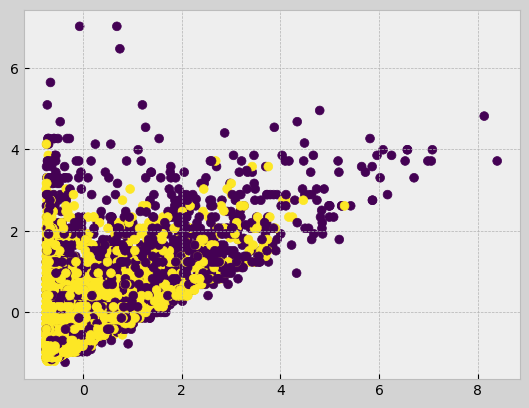

In [97]:
plot1 (DB)

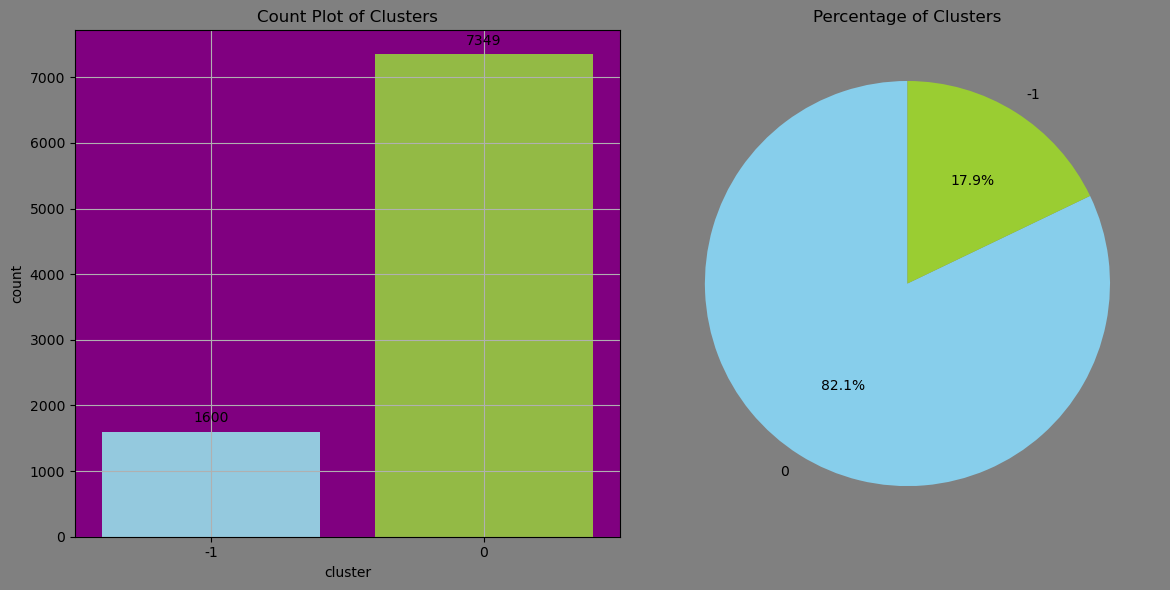

In [98]:
plot2 (DBV)

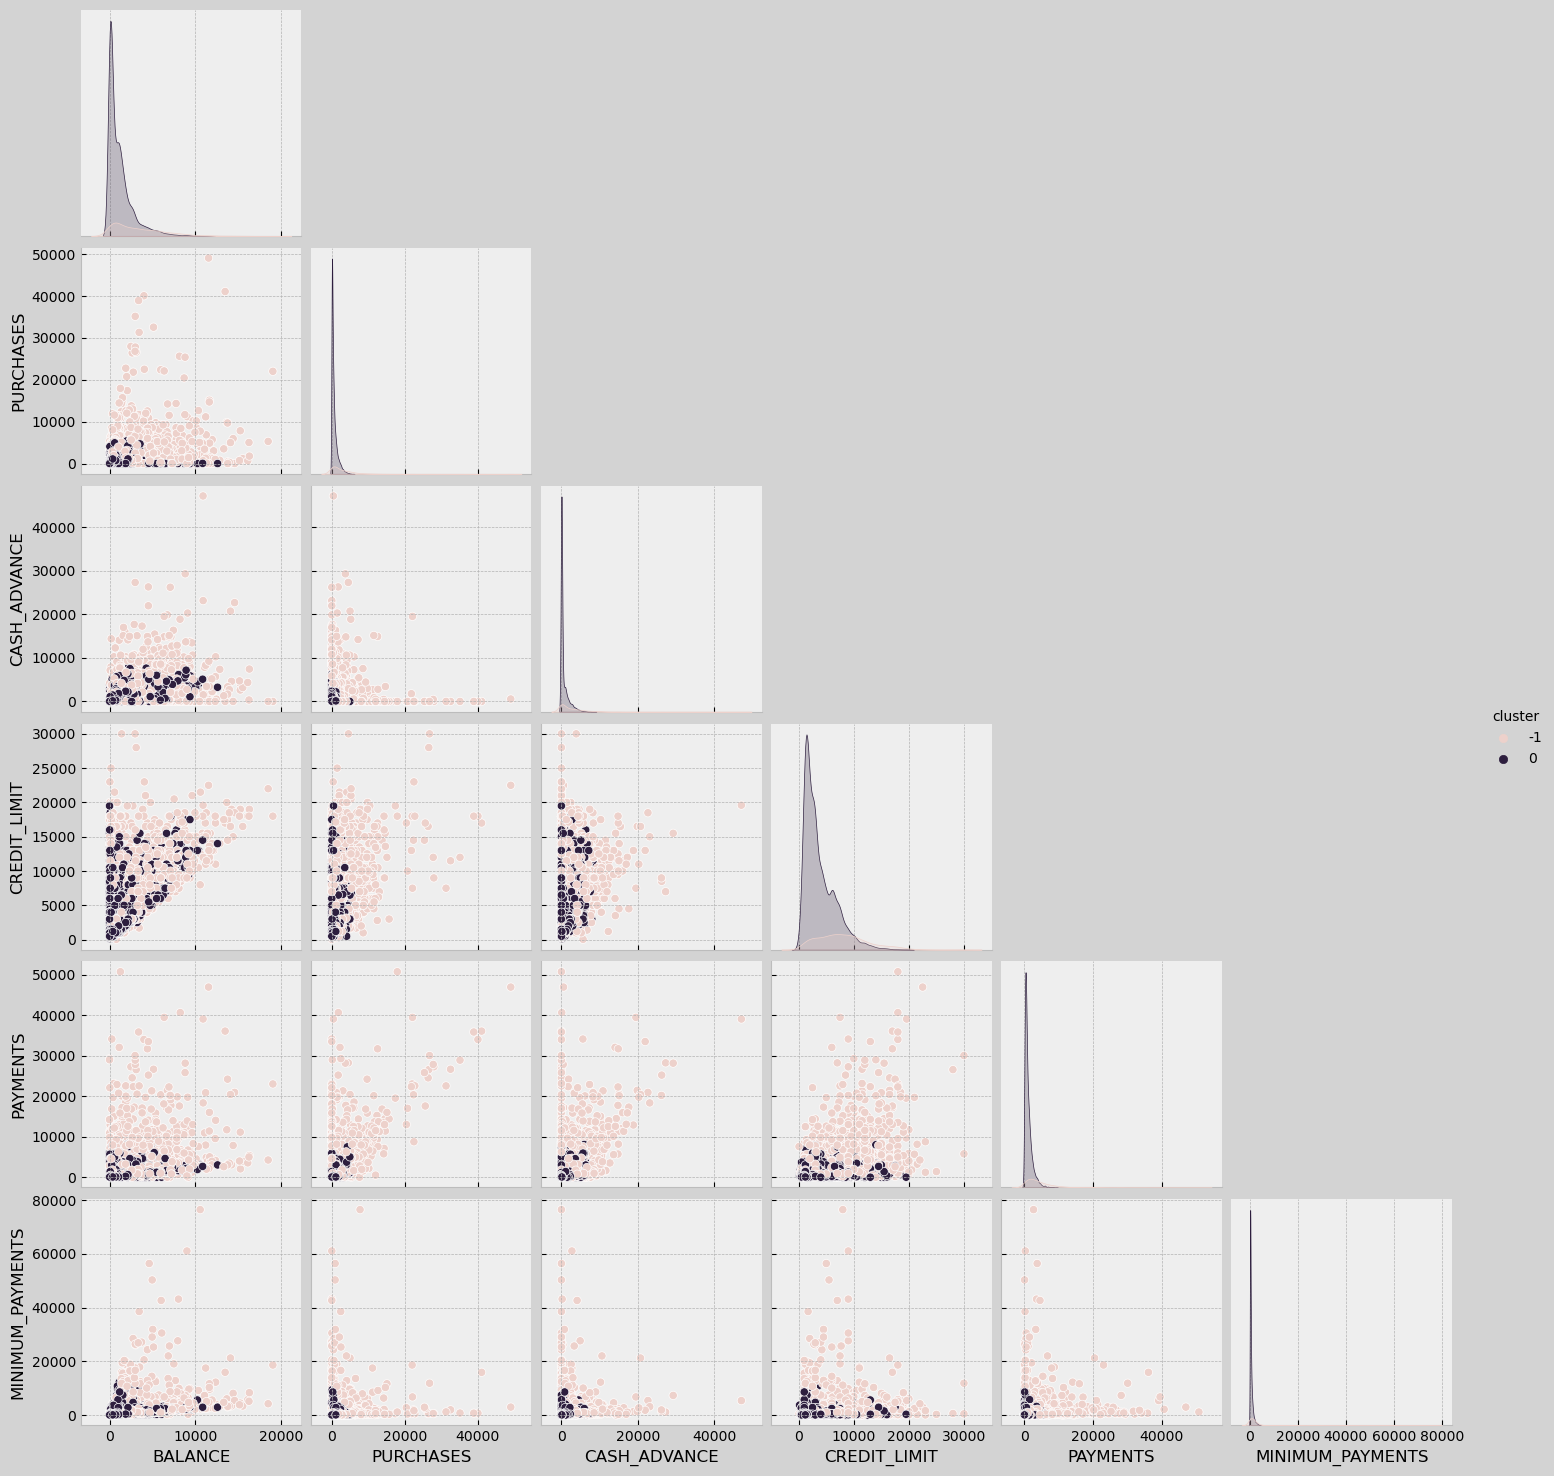

In [99]:
plot3 (DBV)

# <div style="padding: 10px; background-color:#215669; margin: 0; color:#D8C4E1 ; font-family: Gill Sans, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;">Birch</div>

In [100]:
silhouette = []
calinski_harabasz = []
davies_bouldin = []
for k in range(2,11):
    BR = Birch (n_clusters = k)
    BR.fit (scaled_features)
    
    score = silhouette_score (scaled_features , BR.predict(scaled_features))
    silhouette.append (score)
    
    score1 = calinski_harabasz_score (scaled_features, BR.predict(scaled_features))
    calinski_harabasz.append(score1)
    
    score2 = davies_bouldin_score (scaled_features, BR.predict(scaled_features))
    davies_bouldin.append (score2)

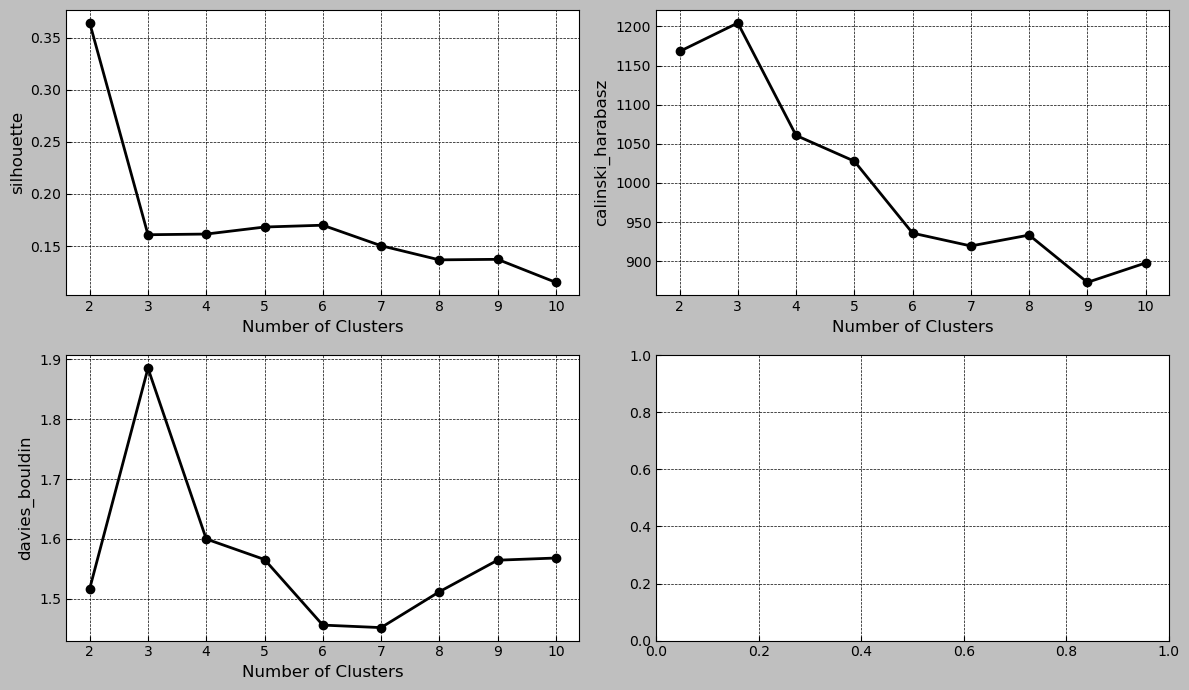

In [101]:
plt.style.use ('grayscale')
fig, axs = plt.subplots(2, 2, figsize=(12, 7))

metrics = {'silhouette': silhouette, 'calinski_harabasz': calinski_harabasz,
           'davies_bouldin': davies_bouldin}
metrics_list = list(metrics.items()) 

for i in range(2): 
    for j in range(2): 
        index = i*2 + j
        if index < len(metrics_list):
            metric_name, metric_values = metrics_list[i*2 + j] 
            axs[i, j].plot(range(2, 11), metric_values , marker = 'o')
            axs[i, j].set_xticks(range(2, 11))
            axs[i, j].set_xlabel('Number of Clusters')
            axs[i, j].set_ylabel(metric_name)
            axs[i, j].grid(True)

plt.tight_layout()
plt.show()

<div style = 'border : 3px solid non; background-color:#8F9AB3;padding:10px;color:#FFFFFF'>
    <p>best score in silhouette and davies_bouldin is for 2 clusters<p>
    <p>and best score in calinski_harabasz is 3 but 2 has good score too.<p>
    <p>so i'm going to choose 2 for n_clusters<p>

<div style = 'border : 3px solid non;text-align: center; background-color:#8F9AB3; padding:10px; color:#FFFFFF'>changing parameters for better clustering

<div style = 'border : 3px solid non; background-color:#8F9AB3;padding:10px;color:#FFFFFF'>
    <p>parameters :<p>
    <p>threshold : float, default=0.5<p>

In [102]:
silhouette = []
calinski_harabasz = []
davies_bouldin = []
threshold_values = range(1, 10, 1)
for i in threshold_values:
    i = i / 10
    BR = Birch (n_clusters = 2 , threshold = i)
    BR.fit (scaled_features)
    score = silhouette_score(scaled_features, BR.predict(scaled_features))
    silhouette.append(score)
    score1 = calinski_harabasz_score (scaled_features, BR.fit_predict(scaled_features))
    calinski_harabasz.append(score1)
    score2 = davies_bouldin_score (scaled_features, BR.fit_predict(scaled_features))
    davies_bouldin.append (score2)


df_silhouette = pd.DataFrame(silhouette, columns=['silhouette_score'])
df_calinski_harabasz = pd.DataFrame(calinski_harabasz, columns=['calinski_harabasz'])
df_davies_bouldin = pd.DataFrame(davies_bouldin , columns=['davies_bouldin'])
df_threshold = pd.DataFrame(threshold_values, columns=['threshold'])
result = pd.concat([df_threshold, df_silhouette, df_calinski_harabasz , df_davies_bouldin], axis=1)
result

threshold  silhouette_score  calinski_harabasz  davies_bouldin
0          1          0.269168        1323.292235        1.750083
1          2          0.288805        1294.934598        1.703446
2          3          0.238489        1275.056523        1.855769
3          4          0.187948        1445.156300        2.013210
4          5          0.364085        1167.989160        1.516970
5          6          0.415720        1264.946600        1.405640
6          7          0.416784        1200.429521        1.400158
7          8          0.164431        1364.756782        2.131505
8          9          0.432215        1213.602044        1.373378

<div style = 'border : 3px solid non; background-color:#8F9AB3;padding:10px;color:#FFFFFF'>
    <p>less threshold value means more sepration so i put less threshold values which have also good scores<p>
    <p>i choose .2<p>

<div style = 'border : 3px solid non;text-align: center; background-color:#8F9AB3; padding:10px; color:#FFFFFF'>going to visualize sample labels (clustering by Birch)

In [103]:
BRV = df.copy ()
BR = Birch (n_clusters = 2 , threshold = .2)
BR.fit (scaled_features)
BRV ['cluster'] = BR.fit_predict (scaled_features)

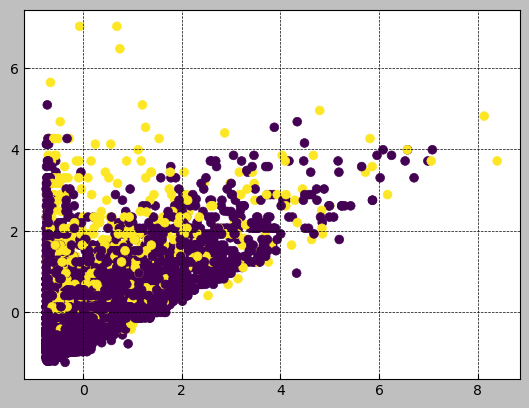

In [104]:
plot1 (BR)

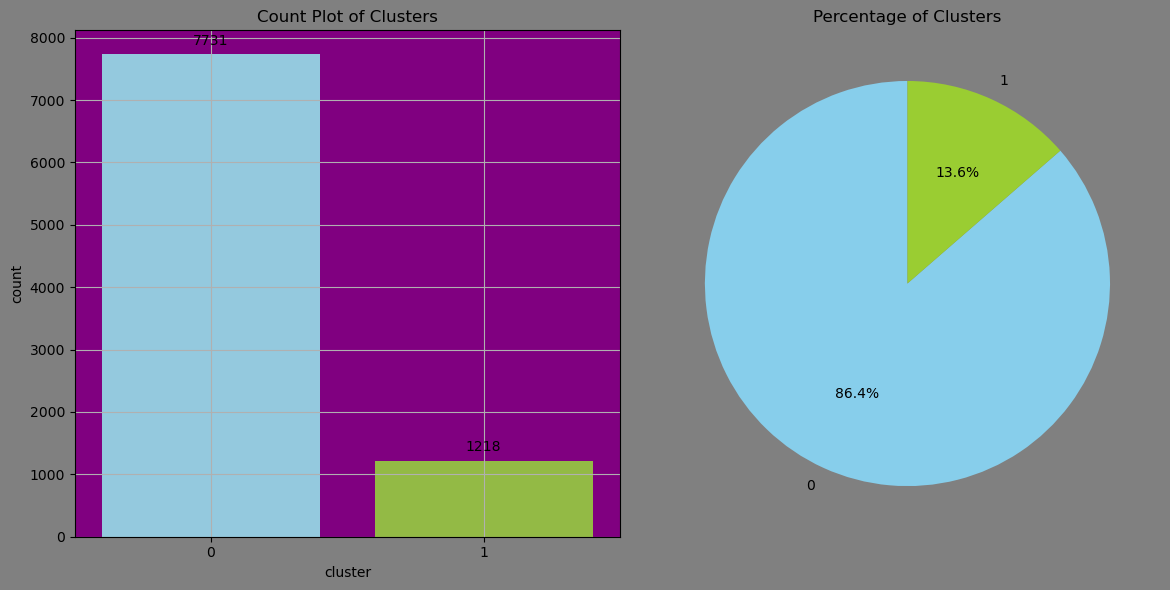

In [105]:
plot2 (BRV)

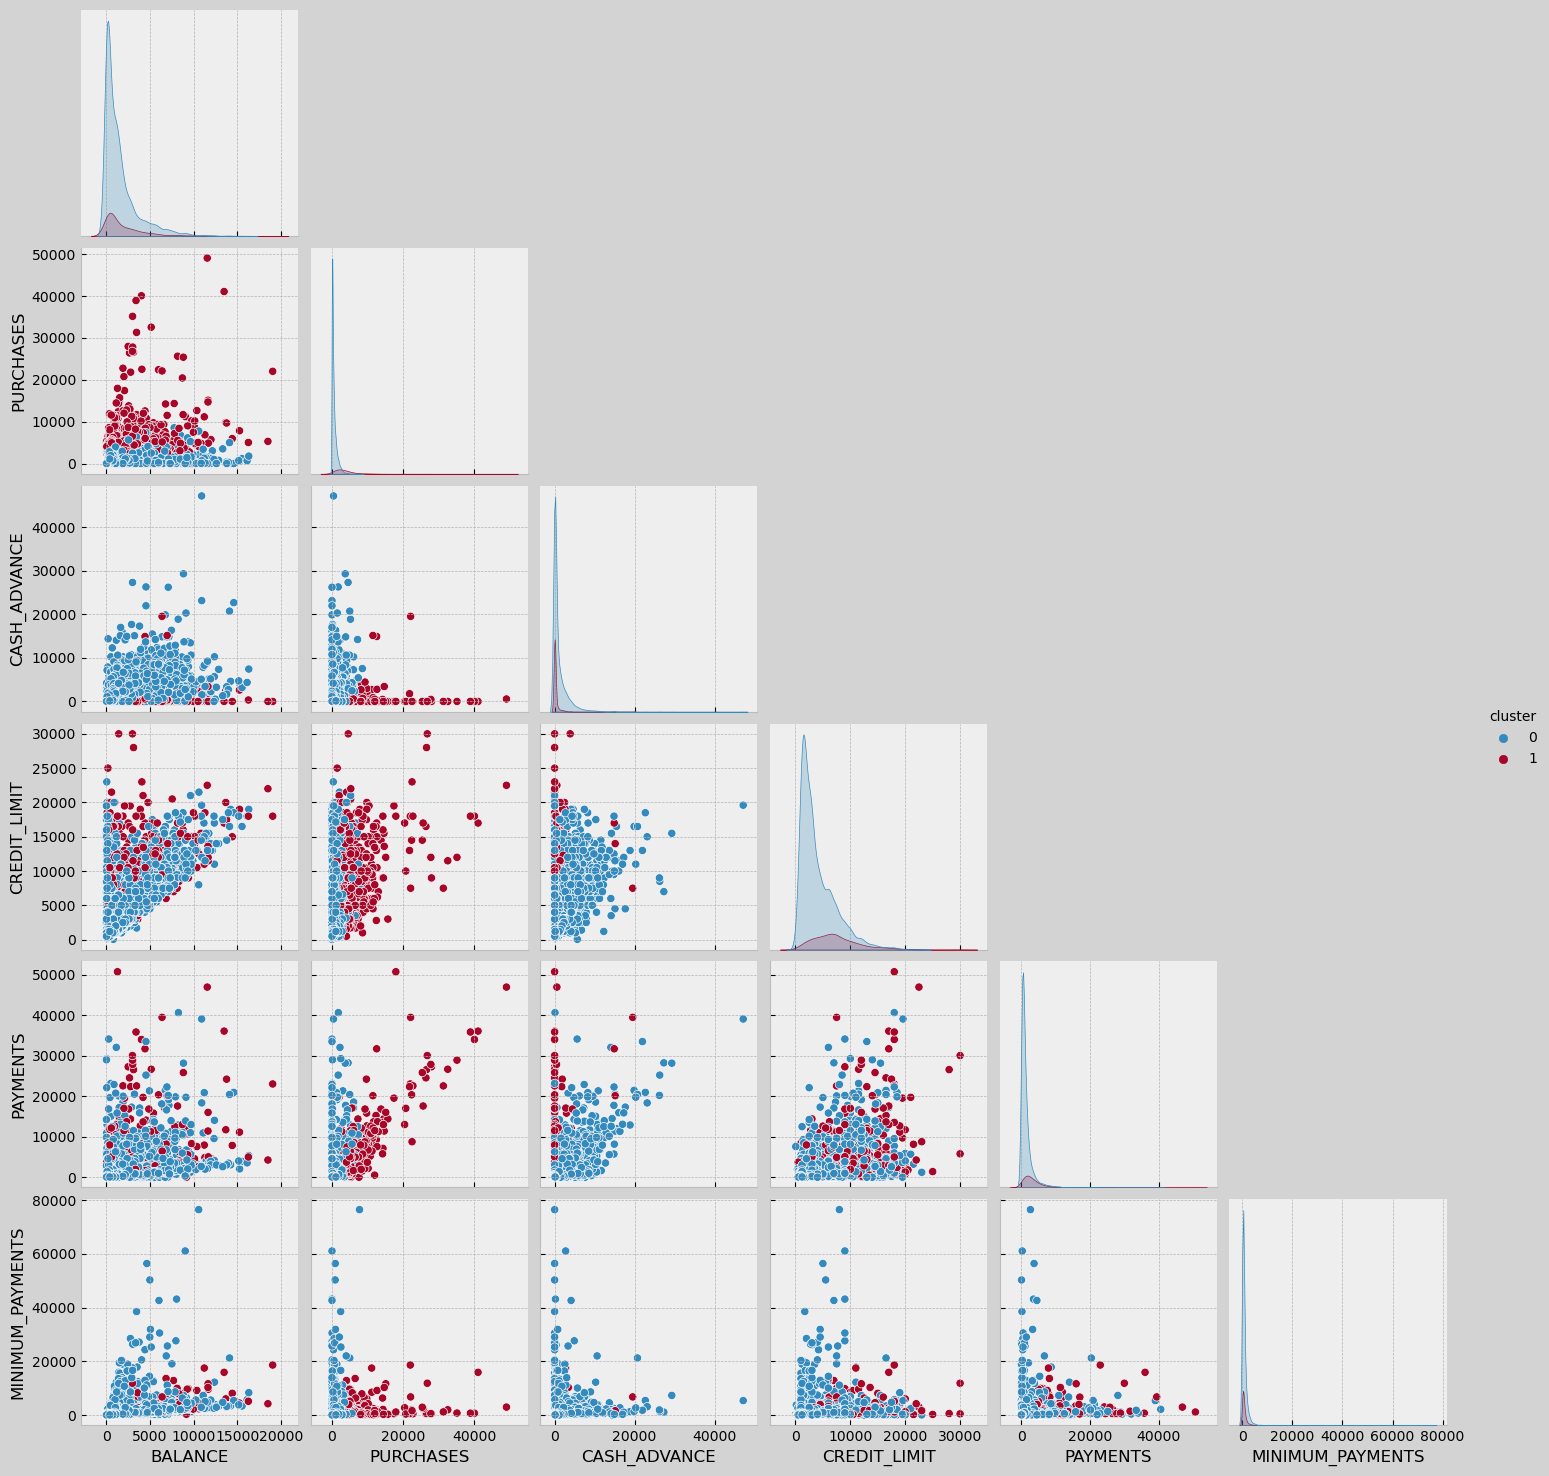

In [106]:
plot3 (BRV)

# <div style="padding: 10px; background-color:#215669; margin: 0; color:#D8C4E1 ; font-family: Gill Sans, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;">Final visualization and comprehension</div>

<div style = 'border : 3px solid non; background-color:#8F9AB3;padding:10px;color:#FFFFFF'>
    <p>our final models : <p>
    <p>GMM = GaussianMixture (n_components = 2 , random_state = 1 )<p>
    <p>kmeans = KMeans(n_clusters = 3 , random_state = 42)<p>
    <p>MB = MiniBatchKMeans (n_clusters = 3 , random_state = 42 , init = 'random' , batch_size = 1012)<p>
    <p>AP = AffinityPropagation (random_state = 42 , damping = .9)<p>
    <p>MS = MeanShift (bandwidth = 12 , n_jobs = -1)<p>
    <p>AG = AgglomerativeClustering (n_clusters = 2 , linkage = 'ward')<p>
    <p>DB = DBSCAN (eps = 1.5 , min_samples = 11 , n_jobs = -1)<p>
    <p>BR = Birch (n_clusters = 2 , threshold = .2)<p>

In [107]:
last = [    
    {'model' : 'GaussianMixture'  , 'N clusters' : 2 , 'silhouette' : 0.196 , 'calinski_harabasz' : 1184.19 , 'davies_bouldin' : 2.374} , 
    {'model' : 'KMeans'  , 'N clusters' : 3 , 'silhouette' : 0.250 , 'calinski_harabasz' : 1604.88 , 'davies_bouldin' : 1.597 } ,
    {'model' : 'MiniBatchKMeans'  , 'N clusters' : 3 , 'silhouette' : 0.271 , 'calinski_harabasz' : 1556.10 , 'davies_bouldin' : 1.543 } ,
    {'model' : 'AffinityPropagation'  , 'N clusters' : 371 , 'silhouette' : 0.128 , 'calinski_harabasz' : 233.61 , 'davies_bouldin' : 1.239 } ,
    {'model' : 'MeanShift'  , 'N clusters' : 5 , 'silhouette' : 0.749 , 'calinski_harabasz' : 264.26 , 'davies_bouldin' : 0.718 } ,
    {'model' : 'AgglomerativeClustering'  , 'N clusters' : 2 , 'silhouette' : 0.175 , 'calinski_harabasz' : 1418.18 , 'davies_bouldin' : 2.078 } , 
    {'model' : 'DBSCAN'  , 'N clusters' : 2 , 'silhouette' : 0.332 , 'calinski_harabasz' : 1046.95 , 'davies_bouldin' : 2.447 } , 
    {'model' : 'Birch'  , 'N clusters' : 2 , 'silhouette' : 0.288 , 'calinski_harabasz' : 1294.93 , 'davies_bouldin' : 1.703 } 
]
    
last = pd.DataFrame (last)
last

model  N clusters  silhouette  calinski_harabasz  \
0          GaussianMixture           2       0.196            1184.19   
1                   KMeans           3       0.250            1604.88   
2          MiniBatchKMeans           3       0.271            1556.10   
3      AffinityPropagation         371       0.128             233.61   
4                MeanShift           5       0.749             264.26   
5  AgglomerativeClustering           2       0.175            1418.18   
6                   DBSCAN           2       0.332            1046.95   
7                    Birch           2       0.288            1294.93   

   davies_bouldin  
0           2.374  
1           1.597  
2           1.543  
3           1.239  
4           0.718  
5           2.078  
6           2.447  
7           1.703

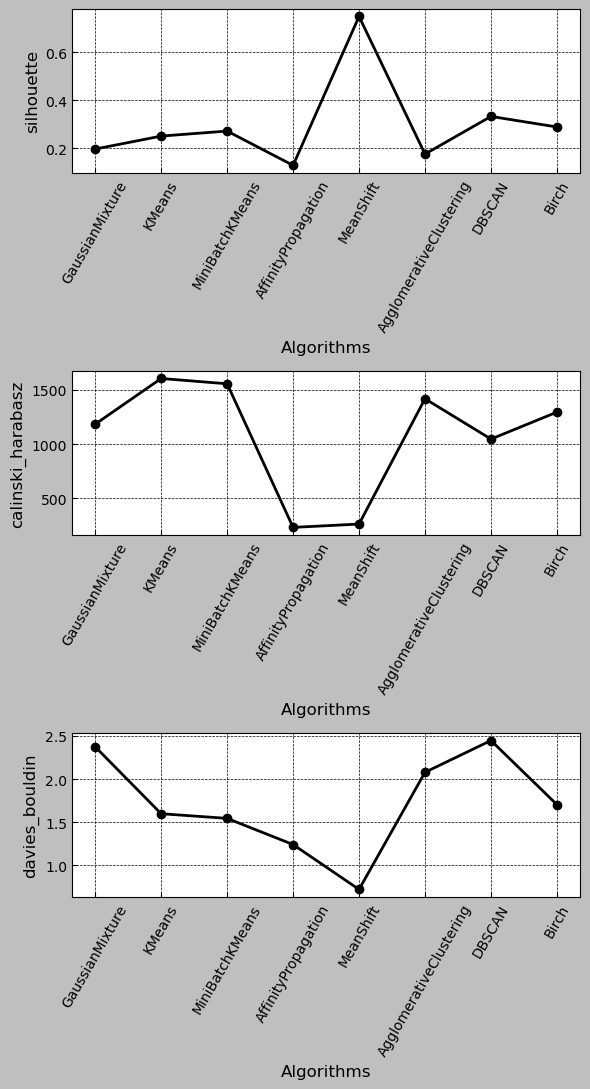

In [108]:
plt.style.use('grayscale')
plt.figure (figsize = (6 , 11))
metrics = ['silhouette' , 'calinski_harabasz' , 'davies_bouldin']

for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 1, i)
    plt.plot(last.model, last[metric], marker = 'o')
    plt.xlabel('Algorithms')
    plt.xticks(rotation = 60)
    plt.ylabel(metric)
    plt.grid(True)

plt.tight_layout() 
plt.show()

In [109]:
top_3_silhouette_score = last.nlargest(4, 'silhouette')
top_3_silhouette_score

model  N clusters  silhouette  calinski_harabasz  davies_bouldin
4        MeanShift           5       0.749             264.26           0.718
6           DBSCAN           2       0.332            1046.95           2.447
7            Birch           2       0.288            1294.93           1.703
2  MiniBatchKMeans           3       0.271            1556.10           1.543

In [110]:
top_3_calinski_harabasz_score = last.nlargest(3, 'calinski_harabasz')
top_3_calinski_harabasz_score

model  N clusters  silhouette  calinski_harabasz  \
1                   KMeans           3       0.250            1604.88   
2          MiniBatchKMeans           3       0.271            1556.10   
5  AgglomerativeClustering           2       0.175            1418.18   

   davies_bouldin  
1           1.597  
2           1.543  
5           2.078

In [111]:
top_3_davies_bouldin_score = last.nsmallest (5, 'davies_bouldin')
top_3_davies_bouldin_score

model  N clusters  silhouette  calinski_harabasz  \
4            MeanShift           5       0.749             264.26   
3  AffinityPropagation         371       0.128             233.61   
2      MiniBatchKMeans           3       0.271            1556.10   
1               KMeans           3       0.250            1604.88   
7                Birch           2       0.288            1294.93   

   davies_bouldin  
4           0.718  
3           1.239  
2           1.543  
1           1.597  
7           1.703

<div style = 'border : 3px solid non; background-color:#8F9AB3;padding:10px;color:#FFFFFF'>
<p>
    
- meanshift has good scores but as we visualized, its not a good algorithm for this type of data frame, also affinity algoritm for the numbers of its clusters isnt make sense 

- top 3 algorithms based on silhouette score : DBSCAN , Birch	, MiniBatchKMeans

- top 3 algorithms based on calinski_harabasz score : KMeans , MiniBatchKMeans	, AgglomerativeClustering

- top 3 algorithms based on davies_bouldin score : MiniBatchKMeans , KMeans	, Birch<p>

<div style = 'border : 3px solid non; background-color:#8F9AB3;padding:10px;color:#FFFFFF'>
    <p>according to top scores and the name repetition in top 3 algorithm based on different metrics we can say MiniBatchKMeans clusters better for this dataset after this algorithm two KMeans and Birch models had good scores and repetion in top 3s<p>

<div style="padding: 10px; background-color:#215669; margin: 0; color:#D8C4E1 ; font-family: Gill Sans, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;">Wish you the best</div>